In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import csv
from tqdm import tqdm_notebook,tnrange,tqdm_pandas,tqdm
tqdm.pandas(tqdm())

import os
from dateutil import parser
import cPickle as pickle

# %matplotlib nbagg
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from matplotlib import animation
from IPython.core.display import HTML
%matplotlib inline
import timeit
import time
import datetime as dt


import jupyternotify
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)
#notify if cell is finished for cells taking longer than 30 seconds
%autonotify -a 30


0it [00:00, ?it/s]

<IPython.core.display.Javascript object>


Exception in thread Thread-4:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/local/lib/python2.7/dist-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/usr/lib/python2.7/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



In [80]:
plt.rcParams['figure.figsize'] = (20,20)

In [81]:
# ## ONLY RUN IF DATA IS NOT CLEAN 
# with open('urinal-data-28-nov.csv','r') as raw, open('urinal-data-28-nov_clean.csv', 'a') as clean_f:
#     for line in raw:
#         if(len(line.split(',')) != 65):
#             print(len(line))
#         else:
#             clean_f.write(line)
# df = pd.read_csv("urinal-data-28-nov_clean.csv")
# df.columns = ["time"]+["P"+str(x) for x in range(64)]

# # remove dirty data
# df = df[[(x[:2] != "TT") for x in df["time"]]]
# df = df[[x[16:18] != ":S" for x in df["time"]]]

# # drop indexes where camera had fallen down/face was in camera
# df = df.drop(range(0,97710+14234), axis=0) #drop row
# df["time"] = df["time"].progress_apply(pd.to_datetime,format="%a %b %d %H:%M:%S %Y") + dt.timedelta(hours=10)
# df = df.set_index('time')

In [5]:
# pickle_name = "urinal-data-28-nov_clean.p"
# pickle_path = "F:\\Research\\ben\\grideye_urinal"
# pickle_full = os.path.join(pickle_path, pickle_name)

# print("looking in", pickle_full)
pickle_full = 'asdf.p'#"urinal-data-28-nov_clean.p"

In [6]:
       
#---------- read in pick or read csv, cleanup, and create pickle----------   
if os.path.isfile(pickle_full):
    print("loading pickle")
    df = pd.read_pickle(pickle_full)
else:
    print("creating pickle...")
    print("this will take some time...")
    df = pd.read_csv("urinal-data-28-nov_clean.csv")
    df.columns = ["time"]+["P"+str(x) for x in range(64)]
    
    # remove dirty data
    df = df[[(x[:2] != "TT") for x in df["time"]]]
    df = df[[x[16:18] != ":S" for x in df["time"]]]
        
    # drop indexes where camera had fallen down/face was in camera
    df = df.drop(range(0,97710+14234), axis=0) #drop row
    df["time"] = df["time"].progress_apply(pd.to_datetime,format="%a %b %d %H:%M:%S %Y") + dt.timedelta(hours=10)
    df = df.set_index('time')
    
    #flip image
    cols = []
    for y in range(7,-1,-1):
            for x in range(8):
                cols.append(x*8+y)
            
    cols = ["P"+str(x) for x in cols] 
    df = df.reindex(columns=cols)
   
    # reset column names
    df.columns = ["P"+str(x) for x in range(64)]
    
    
    
    df.to_pickle(pickle_full)


creating pickle...
this will take some time...




  0%|          | 0/3540396 [00:00<?, ?it/s]

  0%|          | 2/3540396 [00:00<64:26:13, 15.26it/s]

  0%|          | 242/3540396 [00:00<45:13:34, 21.74it/s]

  0%|          | 470/3540396 [00:00<31:47:09, 30.94it/s]

  0%|          | 744/3540396 [00:00<22:21:22, 43.98it/s]

  0%|          | 951/3540396 [00:00<15:47:28, 62.26it/s]

  0%|          | 1146/3540396 [00:00<11:12:17, 87.74it/s]

  0%|          | 1374/3540396 [00:00<7:58:21, 123.31it/s]

  0%|          | 1650/3540396 [00:00<5:41:14, 172.84it/s]

  0%|          | 1927/3540396 [00:00<4:05:15, 240.46it/s]

  0%|          | 2190/3540396 [00:01<2:58:24, 330.54it/s]

  0%|          | 2435/3540396 [00:01<2:13:15, 442.52it/s]

  0%|          | 2696/3540396 [00:01<1:40:03, 589.28it/s]

  0%|          | 2951/3540396 [00:01<1:16:58, 765.89it/s]

  0%|          | 3198/3540396 [00:01<1:01:36, 956.86it/s]

  0%|          | 3439/3540396 [00:01<52:16, 1127.78it/s] 

  0%|          | 3666/3540396 [00:01<46:46, 1260.32it/s]

  0%|          | 

  2%|▏         | 73352/3540396 [00:27<22:53, 2524.27it/s]

  2%|▏         | 73615/3540396 [00:27<24:22, 2370.89it/s]

  2%|▏         | 73862/3540396 [00:28<31:04, 1858.82it/s]

  2%|▏         | 74082/3540396 [00:28<29:39, 1948.27it/s]

  2%|▏         | 74295/3540396 [00:28<31:05, 1857.81it/s]

  2%|▏         | 74495/3540396 [00:28<31:01, 1861.67it/s]

  2%|▏         | 74757/3540396 [00:28<28:21, 2037.16it/s]

  2%|▏         | 74973/3540396 [00:28<29:38, 1948.53it/s]

  2%|▏         | 75281/3540396 [00:28<26:23, 2188.27it/s]

  2%|▏         | 75516/3540396 [00:28<27:59, 2062.93it/s]

  2%|▏         | 75735/3540396 [00:28<27:54, 2068.47it/s]

  2%|▏         | 75951/3540396 [00:29<28:37, 2017.47it/s]

  2%|▏         | 76219/3540396 [00:29<26:29, 2178.73it/s]

  2%|▏         | 76446/3540396 [00:29<27:18, 2113.90it/s]

  2%|▏         | 76664/3540396 [00:29<30:33, 1889.54it/s]

  2%|▏         | 76869/3540396 [00:29<30:06, 1917.53it/s]

  2%|▏         | 77067/3540396 [00:29<33:08, 1741.67it/s

  4%|▍         | 156880/3540396 [00:54<19:32, 2885.21it/s]

  4%|▍         | 157173/3540396 [00:54<20:43, 2720.39it/s]

  4%|▍         | 157470/3540396 [00:54<20:12, 2790.58it/s]

  4%|▍         | 157764/3540396 [00:54<19:53, 2833.29it/s]

  4%|▍         | 158051/3540396 [00:54<20:35, 2737.94it/s]

  4%|▍         | 158328/3540396 [00:54<21:00, 2683.32it/s]

  4%|▍         | 158599/3540396 [00:55<21:24, 2633.24it/s]

  4%|▍         | 158891/3540396 [00:55<20:46, 2712.01it/s]

  4%|▍         | 159220/3540396 [00:55<19:41, 2862.42it/s]

  5%|▍         | 159547/3540396 [00:55<18:57, 2972.99it/s]

  5%|▍         | 159880/3540396 [00:55<18:20, 3070.87it/s]

  5%|▍         | 160241/3540396 [00:55<17:32, 3212.70it/s]

  5%|▍         | 160567/3540396 [00:55<17:38, 3192.97it/s]

  5%|▍         | 160890/3540396 [00:55<17:42, 3180.62it/s]

  5%|▍         | 161232/3540396 [00:55<17:20, 3248.54it/s]

  5%|▍         | 161559/3540396 [00:56<18:41, 3013.35it/s]

  5%|▍         | 161949/3540396 [00:56<1

  7%|▋         | 230534/3540396 [01:21<19:37, 2809.78it/s]

  7%|▋         | 230879/3540396 [01:21<18:33, 2973.43it/s]

  7%|▋         | 231184/3540396 [01:21<18:57, 2910.20it/s]

  7%|▋         | 231493/3540396 [01:21<18:37, 2960.74it/s]

  7%|▋         | 231793/3540396 [01:21<19:13, 2869.53it/s]

  7%|▋         | 232084/3540396 [01:21<19:15, 2863.53it/s]

  7%|▋         | 232388/3540396 [01:21<18:57, 2907.84it/s]

  7%|▋         | 232710/3540396 [01:22<18:25, 2992.62it/s]

  7%|▋         | 233012/3540396 [01:22<19:18, 2856.11it/s]

  7%|▋         | 233301/3540396 [01:22<19:16, 2860.33it/s]

  7%|▋         | 233589/3540396 [01:22<19:50, 2778.00it/s]

  7%|▋         | 233924/3540396 [01:22<18:49, 2927.78it/s]

  7%|▋         | 234221/3540396 [01:22<19:36, 2809.18it/s]

  7%|▋         | 234542/3540396 [01:22<18:53, 2917.23it/s]

  7%|▋         | 234838/3540396 [01:22<19:35, 2812.12it/s]

  7%|▋         | 235170/3540396 [01:22<18:41, 2947.28it/s]

  7%|▋         | 235469/3540396 [01:22<1

  9%|▉         | 332612/3540396 [01:49<08:24, 6362.40it/s]

  9%|▉         | 333256/3540396 [01:49<10:18, 5184.23it/s]

  9%|▉         | 333815/3540396 [01:49<14:59, 3565.48it/s]

  9%|▉         | 334268/3540396 [01:50<30:45, 1736.86it/s]

  9%|▉         | 334609/3540396 [01:50<40:59, 1303.21it/s]

  9%|▉         | 334873/3540396 [01:50<46:25, 1150.87it/s]

  9%|▉         | 335085/3540396 [01:50<42:48, 1247.90it/s]

  9%|▉         | 335339/3540396 [01:51<36:17, 1472.22it/s]

  9%|▉         | 335637/3540396 [01:51<30:47, 1735.05it/s]

  9%|▉         | 335961/3540396 [01:51<26:29, 2015.57it/s]

  9%|▉         | 336225/3540396 [01:51<24:59, 2136.67it/s]

 10%|▉         | 336485/3540396 [01:51<24:38, 2167.29it/s]

 10%|▉         | 336734/3540396 [01:51<25:12, 2118.09it/s]

 10%|▉         | 336969/3540396 [01:51<28:49, 1852.05it/s]

 10%|▉         | 337177/3540396 [01:51<29:00, 1839.98it/s]

 10%|▉         | 337411/3540396 [01:52<27:09, 1965.58it/s]

 10%|▉         | 337621/3540396 [01:52<2

ValueError: time data 'TThu Nov 23 18:00:06 2017"' does not match format '%a %b %d %H:%M:%S %Y' (match)

<IPython.core.display.Javascript object>

In [84]:
df.reset_index(inplace=True)
# test = df["time"].iloc[0:100].progress_apply(pd.to_datetime,format="%a %b %d %H:%M:%S %Y") + dt.timedelta(hours=10)
# test


# Animate A person walking to the middle

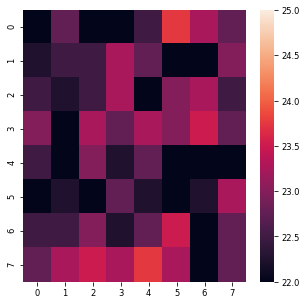

In [85]:
plt.rcParams['figure.figsize'] = (5,5)
# Person walking to middle: walk in - 9911 , walk out - 10198 df.iloc[9911:10198]
frames = []
for row in df.iloc[14233-10:14233].iterrows():
        frames.append(np.array(row[1][1:]).reshape(8,8).astype('float'))

        
# frames = np.array(df.iloc[9910]).reshape(8,8).astype('float')
# frames
sns.heatmap(frames[1], vmin=22, vmax=25)


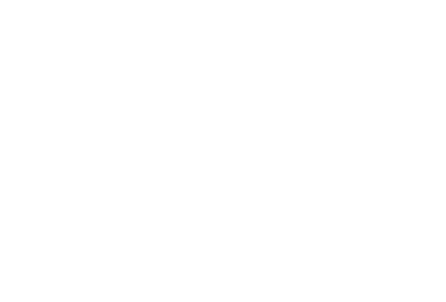

In [86]:
# Low res animation
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib
plt.rcParams['animation.writer'] = 'ffmpeg'
# print(matplotlib.animation.writers.list())
from matplotlib import animation, rc
from IPython.display import HTML

# fig, ax = plt.subplots()
# fig.set_tight_layout(True)
fig = plt.figure()

def init():
    plt.clf()
    sns.heatmap(np.zeros((8, 8)),vmin=23.5,vmax=25)
    plt.clf()
#     return (sns,)

def animate(i):
    plt.clf()
    data = frames[i]
    sns.heatmap(data, vmin=23.5,vmax=25)
    
#     return (sns,)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(frames),interval=100,repeat=False)#,blit = True)
HTML(anim.to_html5_video())
# plt.clf()

#need to return a seaborn object with an "artist object"
#in order to use blit (and therefore speed up rendering)


# Grab Urinal sections

In [87]:
height = 6
n = 8
width_left = 2
width_middle = 3
width_right = 3
bottom_trim = 0

left_mask   = []
middle_mask = []
right_mask  = []
for y in range(n-height,n-bottom_trim):
    # LEFT
    for x in range(width_left):
        left_mask.append(x+y*n) 
    # MIDDLE
    for x in range(width_middle):
         middle_mask.append(x+y*n+width_left) 
    # RIGHT
    for x in range(width_right):
         right_mask.append(x+y*n+width_left+width_middle) 

left_mask = ["P"+str(x) for x in left_mask]  
middle_mask = ["P"+str(x) for x in middle_mask]  
right_mask = ["P"+str(x) for x in right_mask]  

In [88]:
df.head()[middle_mask]

,P18,P19,P20,P26,P27,P28,P34,P35,P36,P42,P43,P44,P50,P51,P52,P58,P59,P60
0,23.0,23.75,22.25,23.50,23.75,22.25,23.00,23.00,23.25,23.25,23.25,23.25,22.75,22.75,22.50,24.00,22.25,24.00
1,23.0,24.00,22.50,23.75,23.50,23.00,22.00,23.00,22.75,22.25,23.25,22.25,22.25,23.00,23.00,23.00,22.25,22.75
2,23.5,23.50,22.25,23.50,23.25,23.25,23.75,23.75,24.00,22.75,23.75,23.00,23.50,22.50,22.75,23.25,23.00,23.50
3,23.0,24.00,22.75,23.75,22.25,23.00,23.00,22.75,23.50,21.75,23.00,22.25,23.25,22.75,24.00,22.75,22.25,23.75
4,23.5,24.25,22.75,22.75,23.00,23.75,23.75,22.75,24.25,22.00,23.75,23.50,24.00,22.50,22.75,23.00,22.25,24.00


# Take Temperature Threshold Each Urinal
## Static Method

In [11]:
# %%notify
# # Which threshold do you want?

# ### --- temperature average that is considered to be a person --- ###
# threshold = 23.5
# ### ------------------------------------------------------------- ###

# pickle_name1 = 'df_tempMeans_'+str(threshold)[0:2]+'_'+str(threshold)[3]+'.p'
# pickle_name2 = 'df_tempMeans_thresh_'+str(threshold)[0:2]+'_'+str(threshold)[3]+'.p'


# if os.path.isfile(pickle_name1) and os.path.isfile(pickle_name2):
#     print("loading pickles")
#     df_tempMeans = pd.read_pickle(pickle_name1)
#     df_tempMeans_thresh = pd.read_pickle(pickle_name2)
# else:
#     print("creating pickle...")
#     print("this will take some time...")
    
#     left  = df[left_mask].mean(axis=1)
#     middle = df[middle_mask].mean(axis=1)
#     right = df[right_mask].mean(axis=1)
#     df_tempMeans = pd.concat([left, middle,right], axis=1)
    
#     # threshold
#     df_tempMeans_thresh = (df_tempMeans > threshold).astype(int)
    
#     df_tempMeans.to_pickle(pickle_name1)
#     df_tempMeans_thresh.to_pickle(pickle_name2)
    

## Adaptive Threshold
1. get background temperature (top row) (Tb)
2. Calculate mean of highest three temperatures for each section (Tm)
3. Compare Tb to Tm (Tm -Tb > threshold)

In [12]:
height = 6 # top 2 rows
n = 8
width_left = 2
width_middle = 3
width_right = 3

left_top   = []
middle_top = []
right_top  = []
for y in range(0,n-height):
    # LEFT
    for x in range(width_left):
        left_top.append(x+y*n) 
    # MIDDLE
    for x in range(width_middle):
         middle_top.append(x+y*n+width_left) 
    # RIGHT
    for x in range(width_right):
         right_top.append(x+y*n+width_left+width_middle) 

left_top = ["P"+str(x) for x in left_top]  
middle_top = ["P"+str(x) for x in middle_top]  
right_top = ["P"+str(x) for x in right_top]  

df[middle_top].sample(10)

,P2,P3,P4,P10,P11,P12
1954273,22.50,23.75,23.00,22.25,23.00,22.00
1366734,23.25,23.25,23.50,23.75,23.75,24.00
3340154,23.00,21.75,22.75,23.00,23.50,23.00
892650,22.50,22.00,22.50,22.25,23.75,22.25
794700,22.50,23.00,22.25,22.25,23.00,22.50
2134117,22.50,23.50,23.00,23.00,23.50,23.00
2152334,22.75,23.50,22.00,22.75,22.75,23.25
638186,23.00,23.25,22.25,22.50,22.25,22.75
1615541,22.50,21.25,23.25,22.75,22.25,22.25
332409,21.25,22.00,23.25,22.25,22.50,22.00


In [13]:
pickle_full_l = 'left_mean3.p'
pickle_full_m = 'middle_mean3.p'
pickle_full_r = 'right_mean3.p'
if os.path.isfile(pickle_full_l) and os.path.isfile(pickle_full_m) and os.path.isfile(pickle_full_r):
    print("loading pickle")
    left = pd.read_pickle(pickle_full_l)
    middle = pd.read_pickle(pickle_full_m)
    right = pd.read_pickle(pickle_full_r)
else:
    print("creating pickle...")
    print("this will take some time...")
    
    # 1. Get Background Temperature (improve by using Kalman filter)
    window = 600 # 1 minute window for background temp

    left_thresh = []
    middle_thresh = []
    right_thresh = []
    print("1")
    for t in tnrange(window/2,len(df),window):  
        left_thresh.append(df.loc[t-window/2:t+window/2,:][left_top].mean().mean())
        middle_thresh.append(df.loc[t-window/2:t+window/2,:][middle_top].mean().mean())
        right_thresh.append(df.loc[t-window/2:t+window/2,:][right_top].mean().mean())
    
    left_thresh = [x for x in left_thresh for _ in range(window)]    
    middle_thresh = [x for x in middle_thresh for _ in range(window)]    
    right_thresh = [x for x in right_thresh for _ in range(window)]  
    
    if len(left_thresh) > len(df):
        left_thresh = left_thresh[0:-(len(left_thresh) - len(df))]
        middle_thresh = middle_thresh[0:-(len(middle_thresh) - len(df))]
        right_thresh = right_thresh[0:-(len(right_thresh) - len(df))]
    elif len(left_thresh) < len(df):    
        left_thresh.extend([left_thresh[-1]]*(len(df) - len(left_thresh)))
        middle_thresh.extend([middle_thresh[-1]]*(len(df) - len(middle_thresh)))
        right_thresh.extend([right_thresh[-1]]*(len(df) - len(right_thresh)))
    else:
        pass

    if not (len(left_thresh) == len(middle_thresh) == len(right_thresh) == len(df)):
        raise AssertionError()
        
    # 2. 
    print("2")
    left  = df[left_mask].copy()
    middle = df[middle_mask].copy()
    right = df[right_mask].copy()
        
    def top_three_mean(numbers):
        count = 0
        m1 = m2 = m3 = float('-inf')
        for x in numbers:
            count += 1
            if x > m3:
                if x >= m2:
                    if x >= m1:
                        m1, m2, m3 = x, m1, m2   
                    else:
                        m3 = m2
                        m2 = x
                else:
                    m3 = x

        tri_mean = np.mean((m1,m2,m3))          
        return tri_mean if count >= 2 else None


    left["mean3"] = left.progress_apply(top_three_mean,axis = 1)
    middle["mean3"] = middle.progress_apply(top_three_mean,axis = 1)
    right["mean3"] = right.progress_apply(top_three_mean,axis = 1)
    
    left["left_thresh"] = left_thresh
    middle["middle_thresh"] = middle_thresh
    right["right_thresh"] = right_thresh

    left.to_pickle('left_mean3.p')
    middle.to_pickle('middle_mean3.p')
    right.to_pickle('right_mean3.p')

loading pickle


### 3. Compare Tb and Tm

In [14]:
left["mean_total"] = left.iloc[:,0:-3].mean(axis=1)
middle["mean_total"] = middle.iloc[:,0:-3].mean(axis=1)
right["mean_total"] = right.iloc[:,0:-3].mean(axis=1)
# left[left["mean3"] - left["mean_total"] > 2]

In [15]:

Tabs = 24.5
Tth = 1.5
df_temp_thresh = pd.DataFrame({"time":df["time"]})
df_temp_thresh["left"] = ((left["mean3"] - left["left_thresh"] > Tth) & (left["mean3"] > Tabs)).astype(int)
df_temp_thresh["middle"] = ((middle["mean3"] - middle["middle_thresh"] > Tth) & (middle["mean3"] > Tabs)).astype(int)
df_temp_thresh["right"] = ((right["mean3"] - right["right_thresh"] > Tth) & (right["mean3"] > Tabs)).astype(int)
# df_temp_thresh["left"] = (left["mean3"] > Tabs).astype(int)
# df_temp_thresh["middle"] = (middle["mean3"] > Tabs).astype(int)
# df_temp_thresh["right"] = (right["mean3"] > Tabs).astype(int)
df_temp_thresh.set_index("time",inplace=True)
df_temp_thresh.sample(5)

,left,middle,right
time,,,
2017-11-26 19:34:31,0,0,0
2017-11-26 15:36:42,0,0,0
2017-11-28 06:42:17,0,0,0
2017-11-26 01:47:57,0,0,0
2017-11-27 21:27:55,0,0,0


# Differentiate Binary Threshold Columnwise

In [16]:
print("Differentiating df_tempMeans_thresh" )
df_temp_diff = df_temp_thresh.diff(axis=0)[1:]
print("complete")
df_temp_diff.reset_index(inplace=True)

assert df_temp_diff["left"].sum() == 0
assert df_temp_diff["middle"].sum() == 0
assert df_temp_diff["right"].sum() == 0
# df_temp_diff.iloc[90:120,1:4,]
# len(df_temp_diff.iloc[:,1][df_temp_diff.iloc[:,1] != 0])

Differentiating df_tempMeans_thresh
complete


In [17]:
df_temp_diff_redL =  pd.concat([df_temp_diff.iloc[:,1][df_temp_diff.iloc[:,1] != 0],df_temp_diff["time"][df_temp_diff.iloc[:,1] != 0]],axis = 1)
df_temp_diff_redM = pd.concat([df_temp_diff.iloc[:,2][df_temp_diff.iloc[:,2] != 0],df_temp_diff["time"][df_temp_diff.iloc[:,2] != 0]],axis = 1)
df_temp_diff_redR = pd.concat([df_temp_diff.iloc[:,3][df_temp_diff.iloc[:,3] != 0],df_temp_diff["time"][df_temp_diff.iloc[:,3] != 0]],axis = 1)
df_temp_diff_redR.head(10)

,right,time
130,1.0,2017-11-23 16:57:14
131,-1.0,2017-11-23 16:57:14
188,1.0,2017-11-23 16:57:21
189,-1.0,2017-11-23 16:57:21
225,1.0,2017-11-23 16:57:25
226,-1.0,2017-11-23 16:57:25
234,1.0,2017-11-23 16:57:26
235,-1.0,2017-11-23 16:57:26
236,1.0,2017-11-23 16:57:26
237,-1.0,2017-11-23 16:57:26


In [18]:
df_temp_diff_redL.columns = ["in_out","time"]
df_temp_diff_redM.columns = ["in_out","time"]
df_temp_diff_redR.columns = ["in_out","time"]

df_temp_diff_redM.head()
len(df_temp_diff_redM)

26994

In [19]:
df_temp_diff_redR["in_out"].iloc[0]

1.0

In [20]:
#check in_out always alternates-->it always does
prev = -1
test = df_temp_diff_redL
for i in tnrange(len(test)):
    
    curr = test["in_out"].iloc[i]
    if curr == prev:
        print(test["time"].iloc[i])
        raise AssertionError()
    prev = curr

In [21]:
def in_out(b):
    try:
        if int(b) == 1:
            return "in"
        elif int(b) == -1:
            return "out"
        else:
            return b
    except:
        return b
    
df_temp_diff_redL["in_out"]    = df_temp_diff_redL["in_out"].apply(in_out)
df_temp_diff_redL["time"]    = df_temp_diff_redL["time"]#.progress_apply(pd.to_datetime) + datetime.timedelta(hours=10)
df_temp_diff_redL["Position"] = ["Left" for x in range(len(df_temp_diff_redL))]

df_temp_diff_redM["in_out"]    = df_temp_diff_redM["in_out"].apply(in_out)
df_temp_diff_redM["time"]    = df_temp_diff_redM["time"]#.progress_apply(pd.to_datetime) + datetime.timedelta(hours=10)
df_temp_diff_redM["Position"] = ["Middle" for x in range(len(df_temp_diff_redM))]

df_temp_diff_redR["in_out"]    = df_temp_diff_redR["in_out"].apply(in_out)
df_temp_diff_redR["time"]    = df_temp_diff_redR["time"]#.progress_apply(pd.to_datetime) + datetime.timedelta(hours=10)
df_temp_diff_redR["Position"] = ["Right" for x in range(len(df_temp_diff_redR))]

In [22]:

rsv = df_temp_diff_redL
rsv = rsv.append(df_temp_diff_redM)
rsv = rsv.append(df_temp_diff_redR)
# rsv = rsv.set_index("time")
# sorted_visits .sample(20)


rsv.sort_index(inplace=True)

rsv.head()

,in_out,time,Position
61,in,2017-11-23 16:57:06,Middle
62,out,2017-11-23 16:57:06,Middle
82,in,2017-11-23 16:57:09,Middle
83,out,2017-11-23 16:57:09,Middle
87,in,2017-11-23 16:57:09,Middle


In [23]:
rsv.index[0]

61

# Collect In and Out Times (as indices)

In [24]:
# in and out are times, and inx and outx are the indexes
in_out_dict = {"Left":{"in":[],"out":[],"inx":[],"outx":[]},"Middle":{"in":[],"out":[],"inx":[],"outx":[]},
               "Right":{"in":[],"out":[],"inx":[],"outx":[]}}

for t in tnrange(len(rsv)):
    in_out_dict[rsv["Position"].iloc[t]][rsv["in_out"].iloc[t]].append(rsv["time"].iloc[t])
    in_out_dict[rsv["Position"].iloc[t]][rsv["in_out"].iloc[t]+'x'].append(rsv.index[t])
    
    

# Remove Non-Stays

In [25]:
from datetime import timedelta

def removeStays(timeFilt):
    left_stays = pd.concat([pd.DataFrame(in_out_dict["Left"]["in"]),pd.DataFrame(in_out_dict["Left"]["out"]),
                           pd.DataFrame(in_out_dict["Left"]["inx"]),pd.DataFrame(in_out_dict["Left"]["outx"])],axis=1)
    left_stays.columns = ["in","out","inx","outx"]
    left_stays = left_stays[left_stays["out"] - left_stays["in"]> timedelta(seconds=timeFilt )]
    left_stays["length"] = left_stays["out"] - left_stays["in"]
    
    middle_stays = pd.concat([pd.DataFrame(in_out_dict["Middle"]["in"]),pd.DataFrame(in_out_dict["Middle"]["out"]),
                             pd.DataFrame(in_out_dict["Middle"]["inx"]),pd.DataFrame(in_out_dict["Middle"]["outx"])],axis=1)
    middle_stays.columns = ["in","out","inx","outx"]
    middle_stays = middle_stays[middle_stays["out"] - middle_stays["in"]> timedelta(seconds=timeFilt )]
    middle_stays["length"] = middle_stays["out"] - middle_stays["in"]

    right_stays = pd.concat([pd.DataFrame(in_out_dict["Right"]["in"]),pd.DataFrame(in_out_dict["Right"]["out"]),
                            pd.DataFrame(in_out_dict["Right"]["inx"]),pd.DataFrame(in_out_dict["Right"]["outx"])],axis=1)
    right_stays.columns = ["in","out","inx","outx"]
    right_stays = right_stays[right_stays["out"] - right_stays["in"]> timedelta(seconds=timeFilt )]
    right_stays["length"] = right_stays["out"] - right_stays["in"]
    
    return left_stays, middle_stays, right_stays



In [26]:
timeFilt = 8
stays = removeStays(timeFilt)
left_stays = stays[0]
middle_stays = stays[1]
right_stays = stays[2]

print("Left: {},Middle:{},Right:{}".format(len(stays[0]),len(stays[1]),len(stays[2])))

Left: 212,Middle:64,Right:176


In [27]:
#210 for 23.5
#74 for 24.0
print(len(left_stays))
left_stays.head(10)

212


,in,out,inx,outx,length
23,2017-11-23 17:05:18,2017-11-23 17:05:52,2509,2814,00:00:34
28,2017-11-23 17:06:30,2017-11-23 17:07:12,3148,3520,00:00:42
69,2017-11-23 17:40:15,2017-11-23 17:40:52,21033,21364,00:00:37
159,2017-11-23 18:17:40,2017-11-23 18:18:04,40866,41079,00:00:24
184,2017-11-23 19:06:46,2017-11-23 19:07:29,66893,67270,00:00:43
233,2017-11-23 19:50:18,2017-11-23 19:50:37,89963,90133,00:00:19
238,2017-11-23 19:52:34,2017-11-23 19:52:47,91166,91281,00:00:13
240,2017-11-23 19:52:49,2017-11-23 19:53:18,91300,91556,00:00:29
294,2017-11-23 20:21:06,2017-11-23 20:21:57,106293,106744,00:00:51
309,2017-11-23 21:12:08,2017-11-23 21:12:36,133344,133595,00:00:28


# Re-sort stay length filtered data

In [28]:
left_stays["Position"] = 'left'
middle_stays["Position"] = 'middle'
right_stays["Position"] = 'right'

sorted_stays = left_stays
sorted_stays = sorted_stays.append(middle_stays)
sorted_stays = sorted_stays.append(right_stays)
# rsv = rsv.set_index("time")
# sorted_visits .sample(20)
# sorted_stays

sorted_stays.sort_index(inplace=True)
sorted_stays.sample(10)
len(sorted_stays)

452

# Search for anomalies

In [78]:
sorted_stays[sorted_stays['length'] > timedelta(seconds=120 )]
# sorted_stays['length']


,in,out,inx,outx,length,Position,hour


In [30]:
left_stays.head()

,in,out,inx,outx,length,Position
23,2017-11-23 17:05:18,2017-11-23 17:05:52,2509,2814,00:00:34,left
28,2017-11-23 17:06:30,2017-11-23 17:07:12,3148,3520,00:00:42,left
69,2017-11-23 17:40:15,2017-11-23 17:40:52,21033,21364,00:00:37,left
159,2017-11-23 18:17:40,2017-11-23 18:18:04,40866,41079,00:00:24,left
184,2017-11-23 19:06:46,2017-11-23 19:07:29,66893,67270,00:00:43,left


## Set Up Figure Parameters

In [31]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.mlab as mlab


params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30,10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'small',
         'ytick.labelsize':'small'}
plt.rcParams.update(params)

# Histograms of Urinal Visit Length > 1 

In [32]:
timeFilt = 1
stays = removeStays(timeFilt)
left_stays = stays[0]
middle_stays = stays[1]
right_stays = stays[2]

# num_stays10 = [len(left_stays), len(middle_stays), len(right_stays)]
# print("left: {} middle: {} right: {} ".format(num_stays10[0],num_stays10[1],num_stays10[2]))
left_stay_mean = left_stays['length'].mean()
left_stay_std = left_stays['length'].std()
left_stay_norm = (left_stays['length'] - left_stay_mean)/left_stay_std

middle_stay_mean = middle_stays['length'].mean()
middle_stay_std = middle_stays['length'].std()
middle_stay_norm = (middle_stays['length'] - middle_stay_mean)/middle_stay_std

right_stay_mean = right_stays['length'].mean()
right_stay_std = right_stays['length'].std()
# right_stay_med = right_stays['length'].median()
right_stay_norm = (right_stays['length'] - right_stay_mean)/right_stay_std


print("left   - mean: {} std: {}\nmiddle - mean: {} std: {}\nright  - mean: {} std: {}\n ".format(left_stay_mean, left_stay_std, middle_stay_mean, middle_stay_std, right_stay_mean, right_stay_std))


left   - mean: 0 days 00:00:13.838951 std: 0 days 00:00:15.623510
middle - mean: 0 days 00:00:08.589473 std: 0 days 00:00:13.607807
right  - mean: 0 days 00:00:17.497409 std: 0 days 00:00:18.474306
 


Text(0.5,1,u'Histogram of Urinal Visit Length > 1 second')

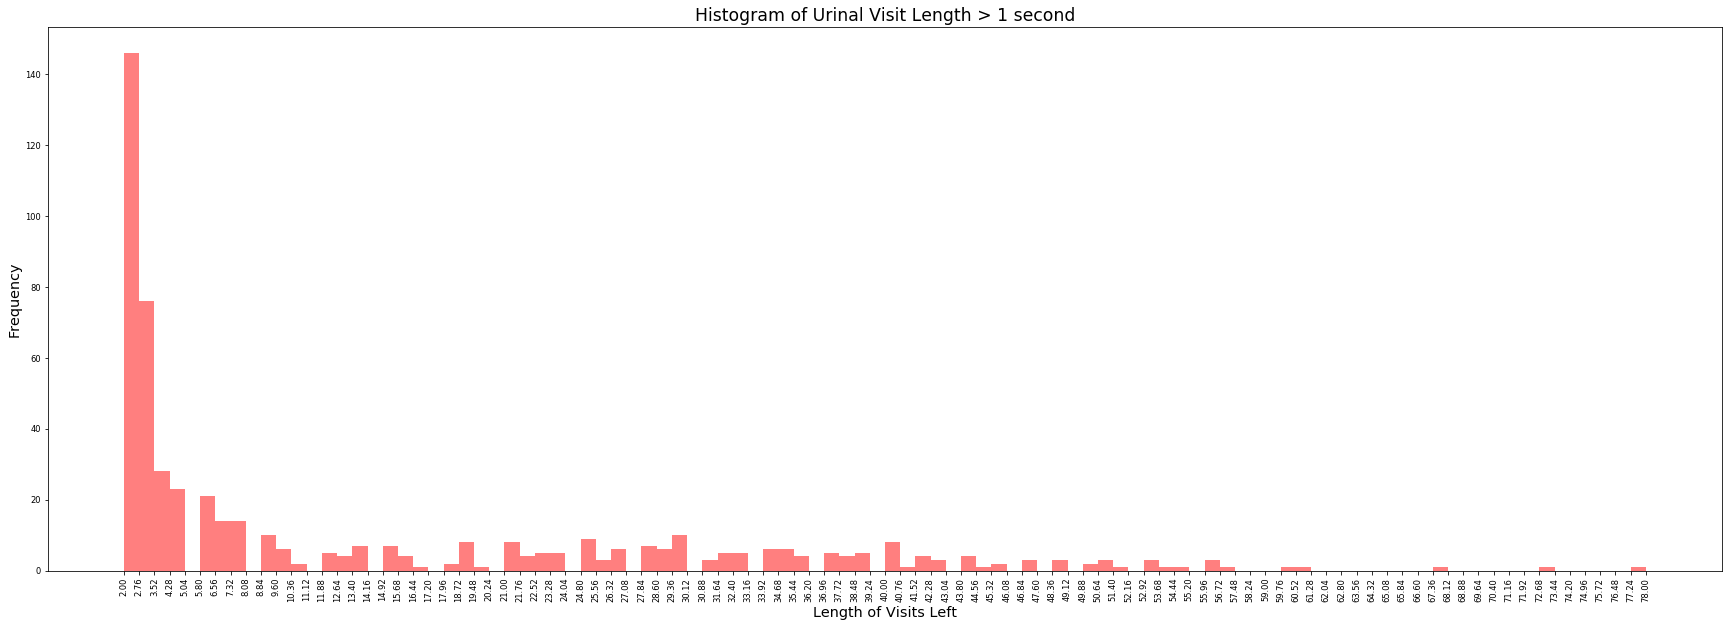

In [33]:

# the histogram of the data
transp = 0.5
bins = 100
fig = plt.figure()
plt.xticks(rotation=90) 
ax = fig.add_subplot(1,1,1,)
n, bins, patches = ax.hist(left_stays["length"].astype('timedelta64[s]'), bins=bins, facecolor='red', alpha=transp, histtype='bar')
ax.set_xticks(bins);

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

plt.xlabel('Length of Visits Left')
plt.ylabel('Frequency')
plt.title('Histogram of Urinal Visit Length > 1 second')


# plt.text(max(left_stays["left_length"]) - 1, max(n)- 10, r'$\mu = {0:.2f}$'.format(left_stay_mean) + '\n' + r'$\sigma = {0:.2f}$'.format(left_stay_std), fontdict=font)


# Histograms of Urinal Visit Length > 5

In [34]:
timeFilt = 5 # 10 = 1 second
stays = removeStays(timeFilt)
left_stays = stays[0]
middle_stays = stays[1]
right_stays = stays[2]

# num_stays10 = [len(left_stays), len(middle_stays), len(right_stays)]
# print("left: {} middle: {} right: {} ".format(num_stays10[0],num_stays10[1],num_stays10[2]))
left_stay_mean = left_stays['length'].mean()
left_stay_std = left_stays['length'].std()
left_stay_norm = (left_stays['length'] - left_stay_mean)/left_stay_std

middle_stay_mean = middle_stays['length'].mean()
middle_stay_std = middle_stays['length'].std()
middle_stay_norm = (middle_stays['length'] - middle_stay_mean)/middle_stay_std

right_stay_mean = right_stays['length'].mean()
right_stay_std = right_stays['length'].std()
# right_stay_med = right_stays['length'].median()
right_stay_norm = (right_stays['length'] - right_stay_mean)/right_stay_std


print("left   - mean: {} std: {}\nmiddle - mean: {} std: {}\nright  - mean: {} std: {}\n ".format(left_stay_mean, left_stay_std, middle_stay_mean, middle_stay_std, right_stay_mean, right_stay_std))


left   - mean: 0 days 00:00:25.452107 std: 0 days 00:00:15.317492
middle - mean: 0 days 00:00:24.564102 std: 0 days 00:00:18.027100
right  - mean: 0 days 00:00:30.945544 std: 0 days 00:00:16.479506
 


Text(0.5,1,u'Histogram of Urinal Visit Length > 5 seconds')

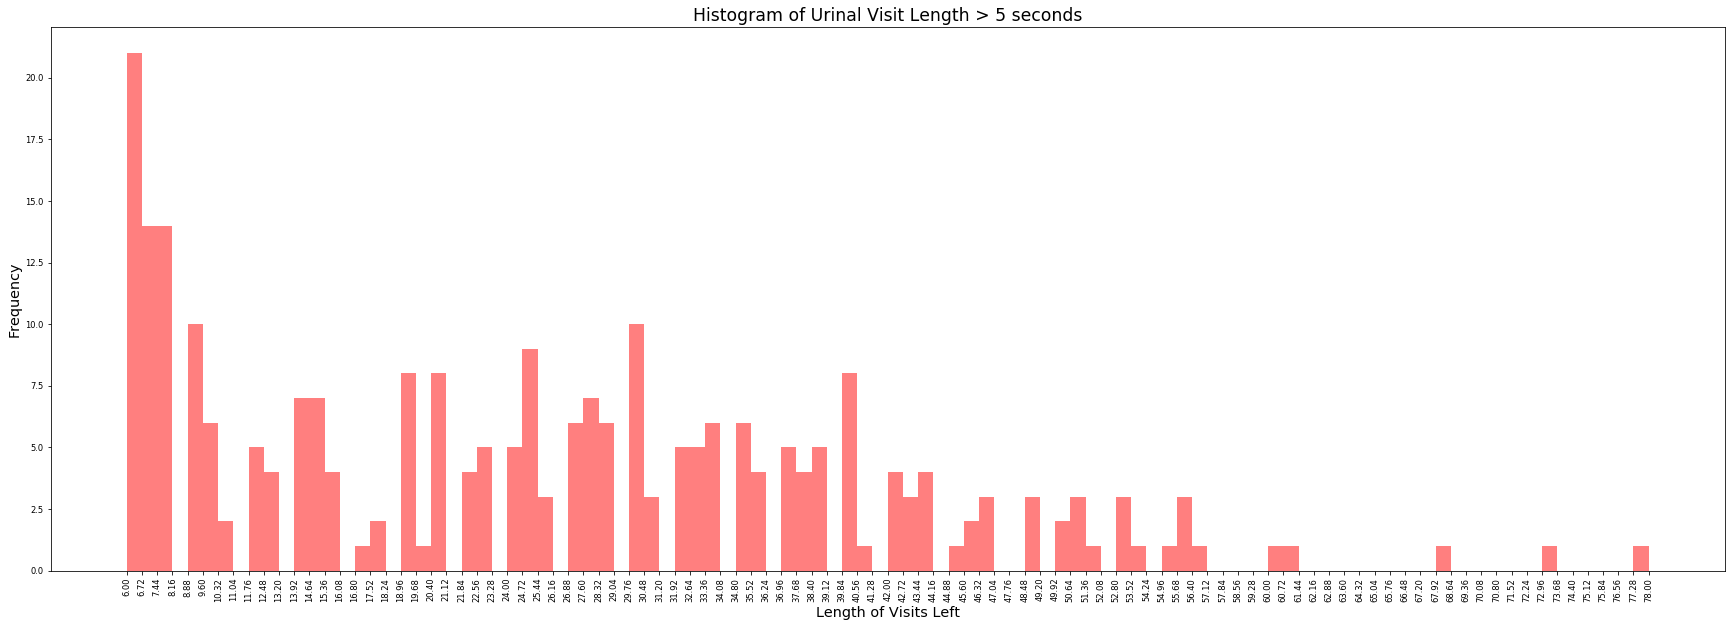

In [35]:
transp = 0.5
bins = 100
fig = plt.figure()
plt.xticks(rotation=90) 
ax = fig.add_subplot(1,1,1,)
n, bins, patches = ax.hist(left_stays["length"].astype('timedelta64[s]'), bins=bins, facecolor='red', alpha=transp, histtype='bar')
ax.set_xticks(bins);

plt.xlabel('Length of Visits Left')
plt.ylabel('Frequency')
plt.title('Histogram of Urinal Visit Length > 5 seconds')


# plt.text(max(left_stays["length"]) - 1, max(n)- 1, r'$\mu = {0:.2f}$'.format(left_stay_mean) + '\n' + r'$\sigma = {0:.2f}$'.format(left_stay_std), fontdict=font)

# ax.xaxis.set_major_formatter(FormatStrFormatter('%0.5f'))

# Histograms of Urinal Visit Length > 8

In [36]:
timeFilt = 10 # 10 = 1 second
stays = removeStays(timeFilt)
left_stays = stays[0]
middle_stays = stays[1]
right_stays = stays[2]

# num_stays10 = [len(left_stays), len(middle_stays), len(right_stays)]
# print("left: {} middle: {} right: {} ".format(num_stays10[0],num_stays10[1],num_stays10[2]))
left_stay_mean = left_stays['length'].mean()
left_stay_std = left_stays['length'].std()
left_stay_norm = (left_stays['length'] - left_stay_mean)/left_stay_std

middle_stay_mean = middle_stays['length'].mean()
middle_stay_std = middle_stays['length'].std()
middle_stay_norm = (middle_stays['length'] - middle_stay_mean)/middle_stay_std

right_stay_mean = right_stays['length'].mean()
right_stay_std = right_stays['length'].std()
# right_stay_med = right_stays['length'].median()
right_stay_norm = (right_stays['length'] - right_stay_mean)/right_stay_std

transp = 0.5
bins = 30

print("left   - mean: {} std: {}\nmiddle - mean: {} std: {}\nright  - mean: {} std: {}\n ".format(left_stay_mean, left_stay_std, middle_stay_mean, middle_stay_std, right_stay_mean, right_stay_std))


left   - mean: 0 days 00:00:31.413265 std: 0 days 00:00:12.993395
middle - mean: 0 days 00:00:31.600000 std: 0 days 00:00:17.070225
right  - mean: 0 days 00:00:35.981927 std: 0 days 00:00:13.684529
 


Text(0,0.5,u'Frequency')

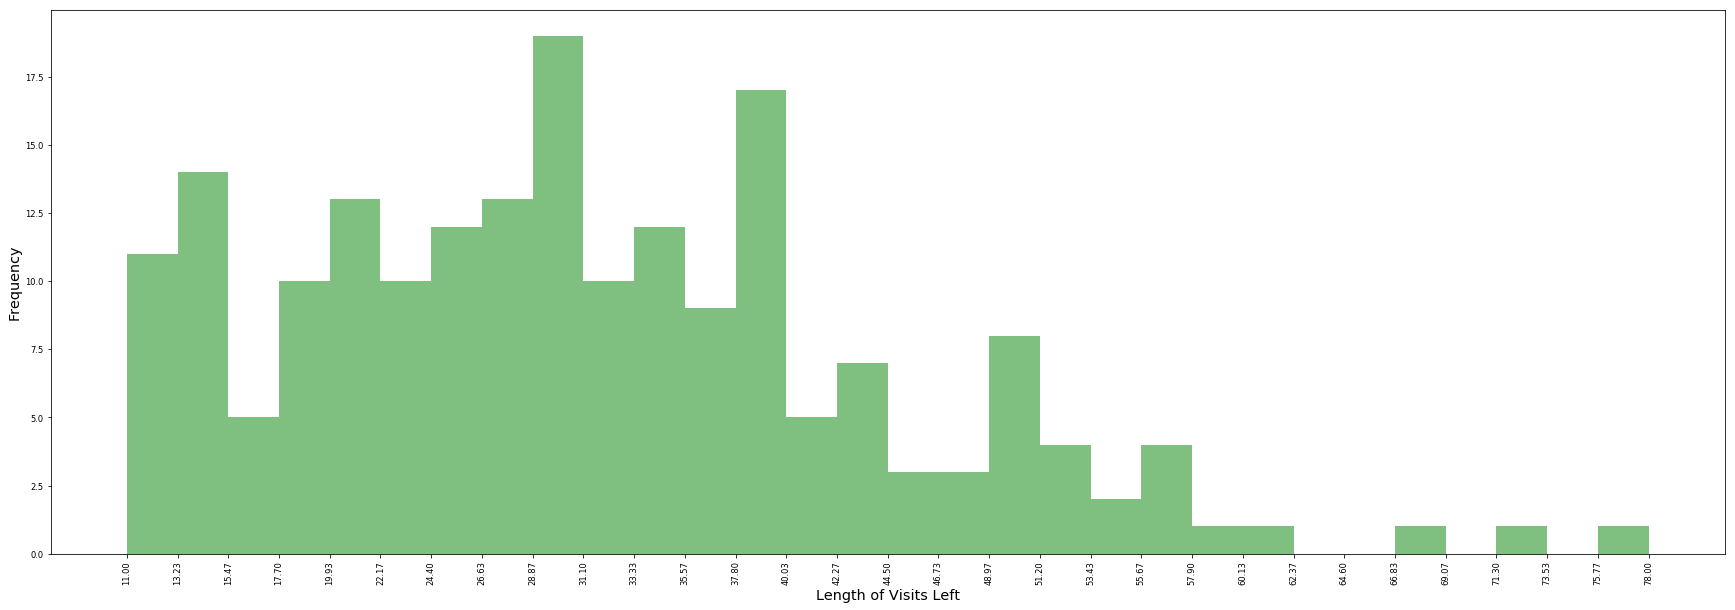

In [37]:

fig = plt.figure()
plt.xticks(rotation=90) 
ax = fig.add_subplot(1,1,1,)
n, bins, patches = ax.hist(left_stays["length"].astype('timedelta64[s]'), bins=bins, facecolor='green', alpha=transp, histtype='bar')
ax.set_xticks(bins);

plt.xlabel('Length of Visits Left')
plt.ylabel('Frequency')
# plt.title('Histogram of Urinal Visit Length > 8 seconds')


# plt.text(max(left_stays["length"]) - 1, max(n)- 1, r'$\mu = {0:.2f}$'.format(left_stay_mean) + '\n' + r'$\sigma = {0:.2f}$'.format(left_stay_std), fontdict=font)

# ax.xaxis.set_major_formatter(FormatStrFormatter('%0.5f'))

Text(0.5,1,u'Middle\n Histogram of Urinal Visit Length')

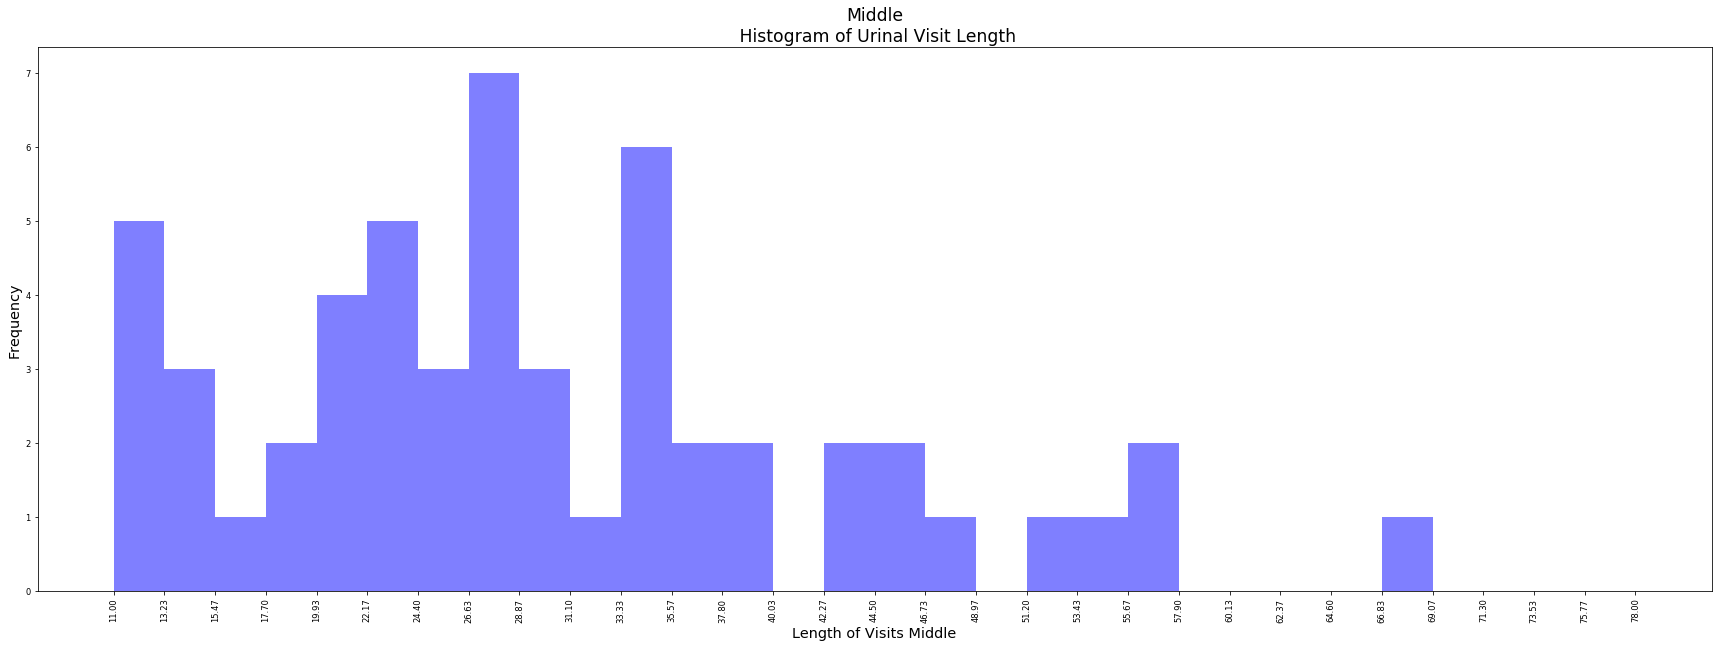

In [38]:

fig = plt.figure()
plt.xticks(rotation=90) 
ax = fig.add_subplot(1,1,1,)
n, bins, patches = ax.hist(middle_stays["length"].astype('timedelta64[s]'), bins=bins, facecolor='blue', alpha=transp, histtype='bar')
ax.set_xticks(bins);

plt.xlabel('Length of Visits Middle')
plt.ylabel('Frequency')
plt.title('Middle\n Histogram of Urinal Visit Length')
# plt.text(max(middle_stays["middle_length"]) - 1 , max(n) - 1, r'$\mu = {0:.2f}$'.format(middle_stay_mean) + '\n' + r'$\sigma = {0:.2f}$'.format(middle_stay_std), fontdict=font)

Text(0.5,1,u'Right\n Histogram of Urinal Visit Length')

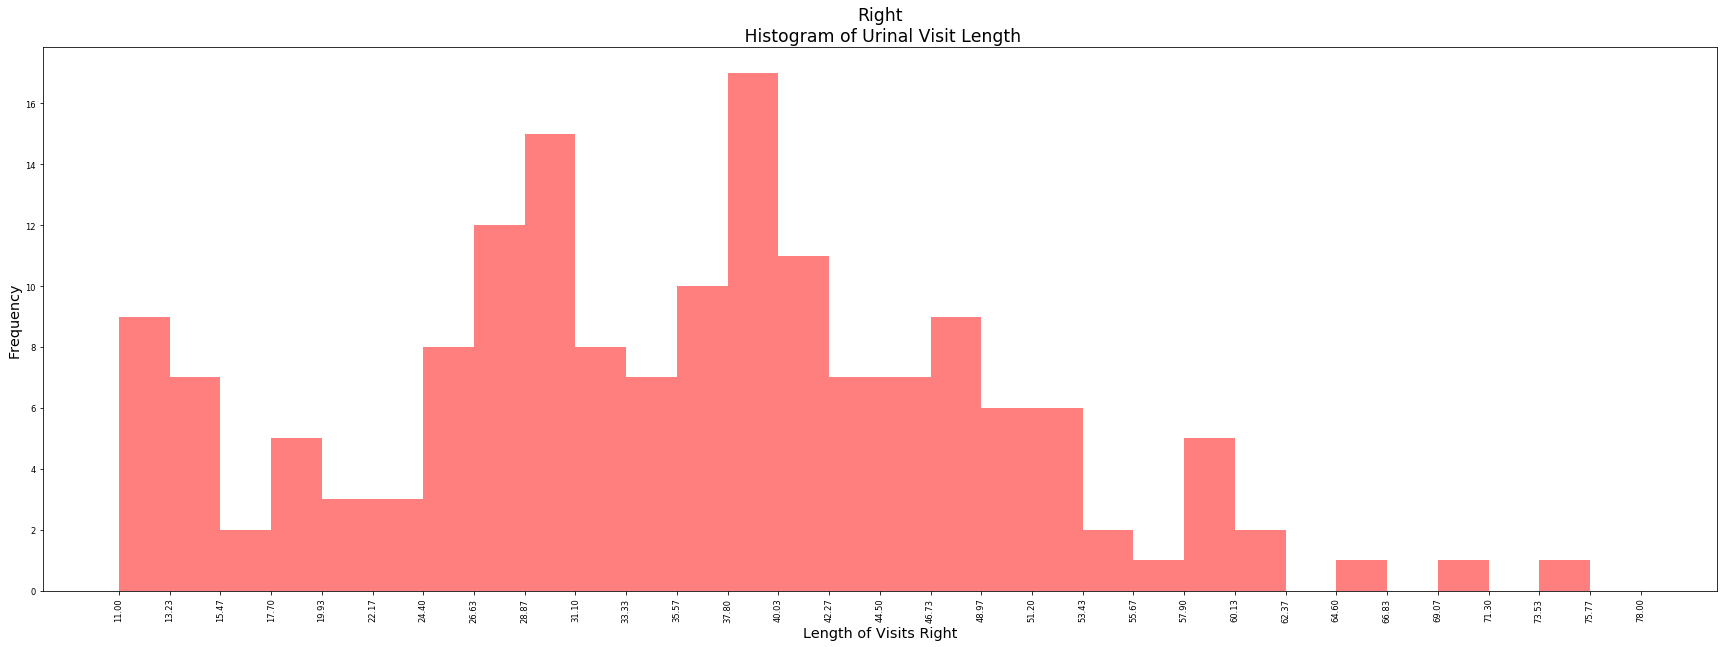

In [39]:

fig = plt.figure()
plt.xticks(rotation=90) 
ax = fig.add_subplot(1,1,1,)
n, bins, patches = ax.hist(right_stays["length"].astype('timedelta64[s]'), bins=bins, facecolor='red', alpha=transp, histtype='bar')
ax.set_xticks(bins);


plt.xlabel('Length of Visits Right')
plt.ylabel('Frequency')
plt.title('Right\n Histogram of Urinal Visit Length')
# plt.text(max(right_stays["right_length"]) - 1, max(n ) - 1, r'$\mu = {0:.2f}$'.format(right_stay_mean) + '\n' + r'$\sigma = {0:.2f}$'.format(right_stay_std), fontdict=font)

In [40]:
left_stays.sample(5)

,in,out,inx,outx,length
1006,2017-11-24 11:08:27,2017-11-24 11:09:04,576396,576728,00:00:37
3246,2017-11-27 13:58:41,2017-11-27 13:58:57,2955777,2955918,00:00:16
3263,2017-11-27 13:59:11,2017-11-27 13:59:36,2956044,2956262,00:00:25
382,2017-11-24 07:48:33,2017-11-24 07:48:52,470450,470620,00:00:19
3587,2017-11-27 16:23:09,2017-11-27 16:23:44,3032338,3032644,00:00:35


In [41]:
sorted_stays.head()

,in,out,inx,outx,length,Position
23,2017-11-23 17:05:18,2017-11-23 17:05:52,2509,2814,00:00:34,left
28,2017-11-23 17:06:30,2017-11-23 17:07:12,3148,3520,00:00:42,left
37,2017-11-23 17:03:22,2017-11-23 17:03:48,1487,1719,00:00:26,right
44,2017-11-23 17:04:28,2017-11-23 17:05:15,2073,2486,00:00:47,right
69,2017-11-23 17:40:15,2017-11-23 17:40:52,21033,21364,00:00:37,left


# Visits per Hour

In [42]:

sorted_stays["hour"] = sorted_stays["in"].dt.hour
# middle_stays["hour"] = middle_stays["Middle_in"].dt.hour
# right_stays["hour"] = right_stays["Right_in"].dt.hour
# right_stays
sorted_stays.head(10)

,in,out,inx,outx,length,Position,hour
23,2017-11-23 17:05:18,2017-11-23 17:05:52,2509,2814,00:00:34,left,17
28,2017-11-23 17:06:30,2017-11-23 17:07:12,3148,3520,00:00:42,left,17
37,2017-11-23 17:03:22,2017-11-23 17:03:48,1487,1719,00:00:26,right,17
44,2017-11-23 17:04:28,2017-11-23 17:05:15,2073,2486,00:00:47,right,17
69,2017-11-23 17:40:15,2017-11-23 17:40:52,21033,21364,00:00:37,left,17
93,2017-11-23 17:12:43,2017-11-23 17:13:23,6444,6793,00:00:40,right,17
107,2017-11-23 17:03:25,2017-11-23 17:03:49,1511,1725,00:00:24,middle,17
109,2017-11-23 17:35:01,2017-11-23 17:35:46,18262,18660,00:00:45,right,17
118,2017-11-23 17:04:18,2017-11-23 17:05:14,1979,2477,00:00:56,middle,17
138,2017-11-23 17:41:32,2017-11-23 17:41:57,21717,21936,00:00:25,right,17


In [43]:
sorted_ins = sorted_stays.drop(["out","outx"], axis = 1)
sorted_ins["in_out"] = "in"
sorted_ins = sorted_ins.rename(columns={'in': 'time', 'inx': 'x'})
sorted_outs = sorted_stays.drop(["in","inx"], axis = 1)
sorted_outs["in_out"] = "out"
sorted_outs = sorted_outs.rename(columns={'out': 'time', 'outx': 'x'})
stays = pd.concat([sorted_ins,sorted_outs], axis=0)

stays.sort_values(by=["x"],inplace = True)

hour_df = pd.concat([stays["hour"],stays["in_out"],stays["time"].dt.day], axis = 1)
hour_df = hour_df[hour_df["in_out"] == "in"]
hour_df = hour_df.rename(columns={'time': 'day'})

stays.drop(["x","hour"],axis = 1,inplace = True)


In [44]:
hour_df["counts"] = 1
hour_df.drop(["in_out"],axis = 1,inplace = True)

In [45]:
# hour_df = sorted_stays.iloc[:,-2:]
hour_counts = hour_df["hour"].value_counts()
# hour_counts = pd.DataFrame(hour_counts)
# sorted_stays["in"][sorted_stays["Position"] == 'left']
# hour_counts["23"] = 0
# print(hour_counts)
hour_counts = hour_counts.sort_index()
# print(hour_counts)
for i in range(24):
    try:
        if hour_counts.index[i] != i:
            hour_counts[i] = 0
            hour_counts.sort_index(inplace=True)
    except IndexError:
        if i == 23:
            hour_counts["23"] = 0

In [46]:
# hour_df["counts"] = 1
adj_check = (hour_df.hour != hour_df.hour.shift()).cumsum()
hour_sums = hour_df.groupby(['day','hour', adj_check], as_index=False, sort=False)['counts'].sum()
hour_sums.sample(5)


,day,hour,counts
10,24,10,20
37,27,13,14
17,24,17,13
23,25,6,4
40,27,16,18


In [47]:
def find_missing_items(int_list,day):
    '''
    Finds missing integer within an unsorted list and return a list of 
    missing items

    >>> find_missing_items([1, 2, 5, 6, 7, 10])
    [3, 4, 8, 9]

    >>> find_missing_items([3, 1, 2])
    []
    '''

    # Put the list in a set, find smallest and largest items
    original_set  = set(int_list)
    smallest_item = 0
    largest_item = 23
    if hour_sums["day"].iloc[-1] == day:
        largest_item  = max(original_set)
    elif hour_sums["day"].iloc[0] == day:
        smallest_item = min(original_set)

    # Create a super set of all items from smallest to largest
    full_set = set(xrange(smallest_item, largest_item + 1))

    # Missing items are the ones that are in the full_set, but not in
    # the original_set
    return sorted(list(full_set - original_set))

first_day =  hour_sums["day"].iloc[0]
last_day = hour_sums["day"].iloc[-1]
for day in range(first_day,last_day+1):
    if day == first_day:
        temp = pd.DataFrame({"day":day,"hour":find_missing_items(hour_sums["hour"][hour_sums["day"] == day],day),"counts":0})
        temp = temp.reindex(columns=["day","hour","counts"])
        hour_sums_inserted = pd.concat([hour_sums[hour_sums["day"] == day],temp],axis=0).sort_values(by="hour")        
        continue
        
    temp = pd.DataFrame({"day":day,"hour":find_missing_items(hour_sums["hour"][hour_sums["day"] == day],day),"counts":0})
    temp = temp.reindex(columns=["day","hour","counts"])
    
    currDay = pd.concat([hour_sums[hour_sums["day"] == day],temp],axis=0).sort_values(by="hour")
    
    hour_sums_inserted = pd.concat([hour_sums_inserted, currDay])
    prevDay = currDay


hour_sums = hour_sums_inserted
hour_sums.sample(5)

,day,hour,counts
23,25,6,4
10,26,10,0
14,26,14,0
13,25,21,0
0,27,0,0



## Get Walk Ins of Visits

## Plot Urinal Visits per Hour

In [48]:
#missing 13
hour_counts.tolist()
hour_counts.index.tolist();

Text(0.5,1,u'Urinal Visits Per Hour')

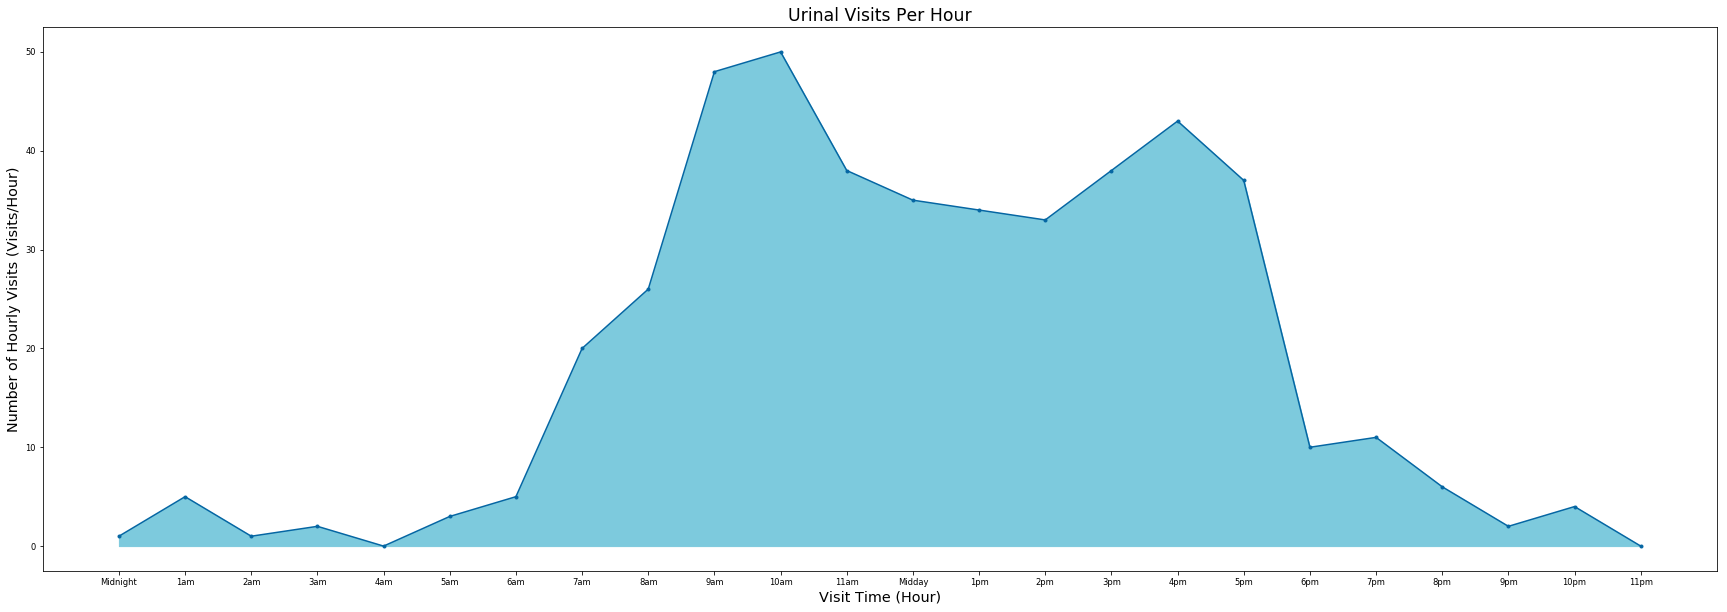

In [49]:
plt.rcParams['figure.figsize'] = (30,10)
visit_times = pd.DataFrame({"Hour Visited":hour_counts})
x = np.arange(0.0, 24, 1)

my_xticks = ["Midnight","1am","2am","3am","4am","5am","6am","7am","8am","9am","10am","11am",
             "Midday"  ,"1pm","2pm","3pm","4pm","5pm","6pm","7pm","8pm","9pm","10pm","11pm"]
plt.xticks(range(24), my_xticks);
plt.plot(x, visit_times, marker='.', lw=1.5, color="#0566A3")
# plt.fill_between(visit_times,range(24))
# plt.plot(x, y, marker='.', lw=1)
d = np.zeros(len(visit_times))
plt.fill_between(x,visit_times.iloc[:,0],where=visit_times.iloc[:,0]>=d, interpolate=True, color='#7DCADD')#"#aee1ec")

plt.xlabel('Visit Time (Hour)')
plt.ylabel('Number of Hourly Visits (Visits/Hour)')
plt.title('Urinal Visits Per Hour')

### last visit before taken down at 8:16, taken down at 8:22

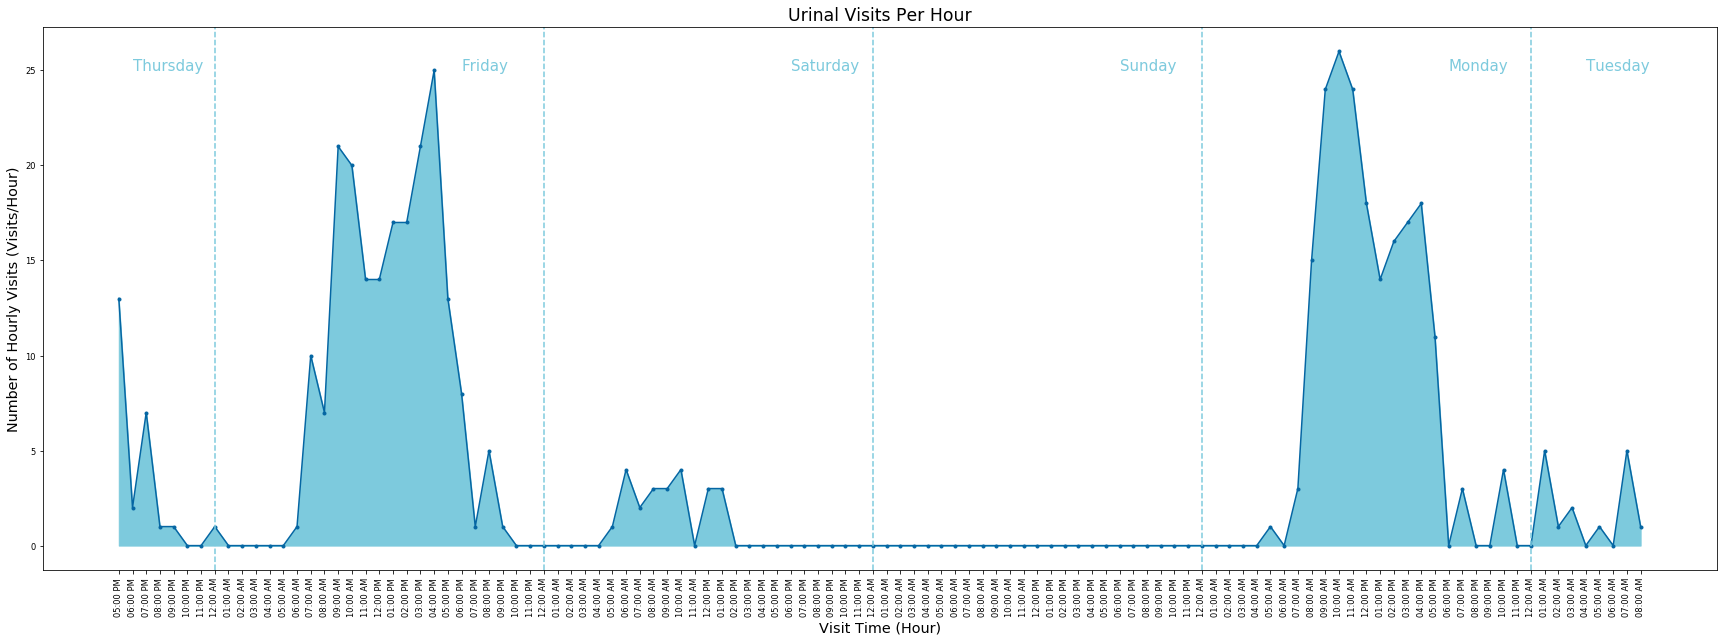

In [70]:

plt.rcParams['figure.figsize'] = (30,10)
num_times = pd.DataFrame({"Num Visists":hour_sums["counts"]})
x = np.arange(0.0, len(num_times), 1)

from datetime import datetime
def hourint_to_12hour(hour):
    return datetime.strptime(str(hour)+":00", "%H:%M").strftime("%I:%M %p")

def dayint_to_12hour(hour):
    return datetime.strptime("11 "+str(hour), "%m %d").strftime("%A")

    
fig, ax1 = plt.subplots()

my_xticks = hour_sums["hour"].apply(hourint_to_12hour)
ax1.set_xticks(range(0,len(hour_sums["hour"])));
ax1.set_xticklabels(my_xticks,rotation=90)
ax1.plot(x, num_times, marker='.', lw=1.5, color="#0566A3")
d = np.zeros(len(num_times))
ax1.fill_between(x,num_times.iloc[:,0],where=num_times.iloc[:,0]>=d, interpolate=True, color='#7DCADD')
N = hour_sums["hour"].iloc[-1] - hour_sums["hour"].iloc[0]

start = 7
days = [dayint_to_12hour(x) for x in range(first_day-1,last_day+1)]
for i in range(0,5):
    
    ax1.axvline(start+24*i,ls="--",color="#7DCADD")
    ax1.annotate(str(days[i]),xy=(start+24*i-6,25),color="#7DCADD",size=15)
i = 5
ax1.annotate(str(days[i]),xy=(start+24*i-20,25),color="#7DCADD",size=15)


ax1.set_xlabel('Visit Time (Hour)');
ax1.set_ylabel('Number of Hourly Visits (Visits/Hour)');
ax1.set_title('Urinal Visits Per Hour');

In [51]:
first_day

23

# Get All state changes

In [52]:
sorted_stays.head()

,in,out,inx,outx,length,Position,hour
23,2017-11-23 17:05:18,2017-11-23 17:05:52,2509,2814,00:00:34,left,17
28,2017-11-23 17:06:30,2017-11-23 17:07:12,3148,3520,00:00:42,left,17
37,2017-11-23 17:03:22,2017-11-23 17:03:48,1487,1719,00:00:26,right,17
44,2017-11-23 17:04:28,2017-11-23 17:05:15,2073,2486,00:00:47,right,17
69,2017-11-23 17:40:15,2017-11-23 17:40:52,21033,21364,00:00:37,left,17


In [53]:
sorted_ins = sorted_stays.drop(["out","outx"], axis = 1)
sorted_ins["in_out"] = "in"
sorted_ins = sorted_ins.rename(columns={'in': 'time', 'inx': 'x'})
sorted_outs = sorted_stays.drop(["in","inx"], axis = 1)
sorted_outs["in_out"] = "out"
sorted_outs = sorted_outs.rename(columns={'out': 'time', 'outx': 'x'})
stays = pd.concat([sorted_ins,sorted_outs], axis=0)

stays.sort_values(by=["x"],inplace = True)
hour_df = stays["hour"]
stays.drop(["x","hour"],axis = 1,inplace = True)




## All Possible State Changes
We assume that only one person can walk in and out at a time.  
given a sampling rate of 10 Hz this is a pretty safe bet.  
We also ignore a "change" where the state remains the same
(this is covered by visit times).

We represent the empty urinal by __0__, and a person by __1__.  
So a state change from 1 person at the left Urinal to the empty state:  
        _100 &rarr; 000 = b100000_


In [54]:
# state_changes = {"000100"}

#----- empty to 1 person changes---

states_dec = [
int('100000',2),
int('010000',2),
int('001000',2),
int('000100',2),
int('000010',2),
int('000001',2),

#----- 1 person to 2 changes---
int('100110',2),
int('100101',2),
int('110100',2),
int('101100',2),

int('010110',2),
int('010011',2),
int('110010',2),
int('011010',2),

int('001011',2),
int('001101',2),
int('011001',2),
int('101001',2),

#----- 2 person to 3 changes---
int('011111',2),
int('101111',2),
int('110111',2),
int('111011',2),
int('111101',2),
int('111110',2)]

states_bin = [bin(states_dec[i])[2:].zfill(6) for i in range(len(states_dec))]

## Count All State Changes

In [55]:
state_changes_df = pd.DataFrame({"Count":np.zeros(len(states_bin)),"State Change":states_bin})
state_changes_df = state_changes_df.set_index("State Change")

curr_state = "000"
prev_state = "000"
state_change = None
for row in stays.iterrows():
    
    # Deteremine the current state
    pos =row[1]["Position"]
    inout = row[1]["in_out"]
#     print(pos)
    #LIN
    if pos == "left" and inout=="in":
        curr_state = int(prev_state,2) | int("100",2)
    # LOUT
    if pos == "left" and inout == "out":
        curr_state = int(prev_state,2) & int("011",2)
    # MIN
    if pos == "middle" and inout =="in":
        curr_state = int(prev_state,2) | int("010",2)
    # MOUT
    if pos == "middle" and inout == "out":
        curr_state = int(prev_state,2) & int("101",2)
    # RIN
    if pos == "right" and inout =="in":
        curr_state = int(prev_state,2) | int("001",2)
    # ROUT
    if pos == "right" and inout == "out":
        curr_state = int(prev_state,2) & int("110",2) 
    
    # Get State Change
    state_change = prev_state + bin(curr_state)[2:].zfill(3)
    state_changes_df.loc[state_change] = state_changes_df.loc[state_change]+1
    prev_state = bin(curr_state)[2:].zfill(3)


In [56]:
total = state_changes_df["Count"].sum()
global_prob = state_changes_df/total
state_changes_df.sort_values(by=["Count"]).T

State Change,111011,110111,101111,111101,111110,011111,011010,010110,010011,100110,...,100101,101100,101001,001101,000010,010000,001000,000001,000100,100000
Count,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,2.0,2.0,...,17.0,18.0,24.0,25.0,58.0,59.0,155.0,157.0,184.0,185.0


In [57]:
total

904.0

# Build a Transistion Matrix

In [58]:
# all states
tri_states = ["000","100","010","001","110","011","101","111"]
# build an empty 8x8 transition matrix
trans_matrix = pd.DataFrame(0.0, index=tri_states, columns=tri_states)


state_changes_df.iloc[0][0]

for i in range(len(state_changes_df)):
#     print(state_changes_df.iloc[i])
    state1 = state_changes_df.iloc[i].name[0:3]
    state2 = state_changes_df.iloc[i].name[3:6]
    trans_matrix[state1][state2] = float(state_changes_df.iloc[i][0])

trans_matrix.T

,000,100,010,001,110,011,101,111
000,0.0,184.0,58.0,157.0,0.0,0.0,0.0,0.0
100,185.0,0.0,0.0,0.0,2.0,0.0,17.0,0.0
010,59.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0
001,155.0,0.0,0.0,0.0,0.0,4.0,25.0,0.0
110,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0
011,0.0,0.0,2.0,3.0,0.0,0.0,0.0,1.0
101,0.0,18.0,0.0,24.0,0.0,0.0,0.0,0.0
111,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# As Row Probabilities

In [59]:
sum_rows = trans_matrix.sum(axis=0).astype(np.float64)
for index, row_sum in enumerate(sum_rows):
    for col in range(trans_matrix.shape[0]):
#         print("{} / {}".format(trans_matrix[tri_states[index]][tri_states[col]].astype(np.float64),row_sum))
        trans_matrix[tri_states[index]][tri_states[col]] = trans_matrix[tri_states[index]][tri_states[col]].astype(np.float64) / float(row_sum)
trans_matrix.T

,000,100,010,001,110,011,101,111
000,0.000000,0.461153,0.145363,0.393484,0.000000,0.000000,0.000000,0.000000
100,0.906863,0.000000,0.000000,0.000000,0.009804,0.000000,0.083333,0.000000
010,0.936508,0.000000,0.000000,0.000000,0.031746,0.031746,0.000000,0.000000
001,0.842391,0.000000,0.000000,0.000000,0.000000,0.021739,0.135870,0.000000
110,0.000000,0.400000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000
011,0.000000,0.000000,0.333333,0.500000,0.000000,0.000000,0.000000,0.166667
101,0.000000,0.428571,0.000000,0.571429,0.000000,0.000000,0.000000,0.000000
111,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000


# Animate

In [ ]:
import svgwrite 

path = [(100,100),(100,200),(200,200),(200,100)]

image = svgwrite.Drawing('test.svg',size=(300,300))

rectangle = image.add(image.polygon(path,id ='polygon',stroke="black",fill="white"))
rectangle.add(image.animateTransform("rotate","transform",id="polygon", from_="0 150 150", to="360 150 150",dur="4s",begin="0s",repeatCount="indefinite"))
text = image.add(image.text('rectangle1',insert=(150,30),id="text"))
text.add(image.animateColor("fill", attributeType="XML",from_="green", to="red",id="text", dur="4s",repeatCount="indefinite"))

image.save()

In [ ]:
# from IPython.display import SVG, display
# def show_svg():
#     display(SVG(url='http://upload.wikimedia.org/wikipedia/en/a/a4/Flag_of_the_United_States.svg'))
from IPython.display import SVG
def show_svg(file_string):
    return SVG(file_string)


In [ ]:
dwg = svgwrite.Drawing('test2.svg', profile='tiny')#size=(300,300))
dwg.add(dwg.line((100, 100), (200, 200), stroke=svgwrite.rgb(100, 50, 0, '%')))
dwg.add(dwg.text('Test', insert=(100, 20)))
dwg.save()

In [ ]:
import svgutils.transform as st

template = st.fromfile('test.svg')
static_svg = st.fromfile('URINAL-ILL.SVG')
template.append(static_svg)
template.save('merged.svg')
show_svg('merged.svg')

# No-one to one person

In [ ]:
plt.rcParams['figure.figsize'] = (10,10)
tri_states = ["000","100","010","001","110","011","101","111"]
zero2one = []
one2zero = []
zeroone = []
for i in range(1,4):
    zero2one.append(state_changes_df.loc[tri_states[0]+tri_states[i]][0])
#     one2zero.append(state_changes_df.loc[tri_states[i]+tri_states[0]][0])

# zero2one.append(one2zero)
print(sum(zero2one))

zeroone = zero2one/sum(zero2one)
print(zeroone)
# zero2one

N = 3.0
ind = np.arange(N)
width = 1/N
fig, ax = plt.subplots()
zeroone = ax.bar(ind, zeroone, width, color='r')


ax.set_xlabel('Urinal')
ax.set_ylabel('Probability (%)')
ax.set_title('Probability of Visit for Empty')
ax.set_xticks(ind)
ax.set_xticklabels(('Left', 'Middle', 'Right'));

# rects = ax.patches

# # Now make some labels
# labels = [zeroone[i] % i for i in xrange(len(rects))]

# for rect, label in zip(rects, labels):
#     height = rect.get_height()
#     ax.text(rect.get_x() + rect.get_width()/2, height , label, ha='center', va='bottom')
# zeroone[0]

In [ ]:
one2zero = []
for i in range(1,4):
    one2zero.append(state_changes_df.loc[tri_states[i]+tri_states[0]][0])

one2zero = one2zero/sum(one2zero)
one2zero

N = 3.0
ind = np.arange(N)
width = 1/N
fig, ax = plt.subplots()
stay10 = ax.bar(ind, one2zero, width, color='r')


ax.set_ylabel('Probability of Visit for Empty')
ax.set_title('Probability (%)')
ax.set_xticks(ind);
ax.set_xticklabels(('Left', 'Middle', 'Right'));

In [ ]:

one2two = []
for i in range(1,4):
    for j in range(4,7):
        try:
            one2two.append(state_changes_df.loc[tri_states[i]+tri_states[j]][0])
        except:
            pass
        
one2two = one2two/sum(one2two)
one2two 

N = float(len(one2two))
ind = np.arange(N)
width = 1/N
fig, ax = plt.subplots()
stay10 = ax.bar(ind, one2two, width, color='r')


ax.set_ylabel('Probability of Visit for Empty')
ax.set_title('Probability (%)')
ax.set_xticks(ind);
# ax.set_xticklabels(('Left', 'Middle', 'Right'))

In [ ]:

two2one = []
for i in range(1,4):
    for j in range(4,7):
        try:
            two2one.append(state_changes_df.loc[tri_states[j]+tri_states[i]][0])
        except:
            pass
two2one = two2one/sum(two2one)
two2one

N = float(len(two2one))
ind = np.arange(N)
width = 1/N
fig, ax = plt.subplots()
stay10 = ax.bar(ind, two2one, width, color='r')


ax.set_ylabel('Probability of Visit for Empty')
ax.set_title('Probability (%)')

In [ ]:

two2three = []
for i in range(4,7):
    two2three.append(state_changes_df.loc[tri_states[i]+tri_states[7]][0])
        
two2three = two2three/sum(two2three)
two2three

N = float(len(two2three))
ind = np.arange(N)
width = 1/N
fig, ax = plt.subplots()
stay10 = ax.bar(ind, two2three, width, color='r')


ax.set_ylabel('Probability of Visit for Empty')
ax.set_title('Probability (%)')

In [ ]:

three2two = []
for i in range(4,7):
    three2two.append(state_changes_df.loc[tri_states[7]+tri_states[i]][0])
        
three2two = three2two/sum(three2two)
three2two

N = float(len(three2two))
ind = np.arange(N)
width = 1/N
fig, ax = plt.subplots()
stay10 = ax.bar(ind, three2two, width, color='r')


ax.set_ylabel('Probability of Visit for Empty')
ax.set_title('Probability (%)')

# ax.set_xticklabels(('Left', 'Middle', 'Right'))

# Get mean Temp for every frame

In [ ]:

pickle_mean = 'frame_mean.p'
if os.path.isfile(pickle_mean):
    print("loading pickle")
    temp_inst = pd.read_pickle(pickle_mean)
else:
    print("creating pickle...")
    print("This takes around 25 mins")
    tqdm.pandas(tqdm())
    # calculate mean of each frame
    temp_inst = df.iloc[:,1:].progress_apply(np.mean,axis=1)
    temp_inst.to_pickle('frame_mean.p')

In [ ]:
# pickle_var = 'frame_var.p'
# if os.path.isfile(pickle_mean):
#     print("loading pickle")
#     temp_inst = pd.read_pickle(pickle_mean)
# else:
#     print("creating pickle...")
#     print("This takes around 25 mins")
#     tqdm.pandas(tqdm())
#     # calculate mean of each frame
#     temp_inst = df.iloc[:,1:].progress_apply(np.mean,axis=1)
#     temp_inst.to_pickle('frame_mean.p')
# temp_var = df.sample(10).iloc[:,1:]#.progress_apply(np.var,axis=1)
temp_var = df.sample(100).iloc[:,1:].progress_apply(np.var,axis=1)


In [ ]:
temp_inst = df.iloc[:,1:].mean(axis=1)

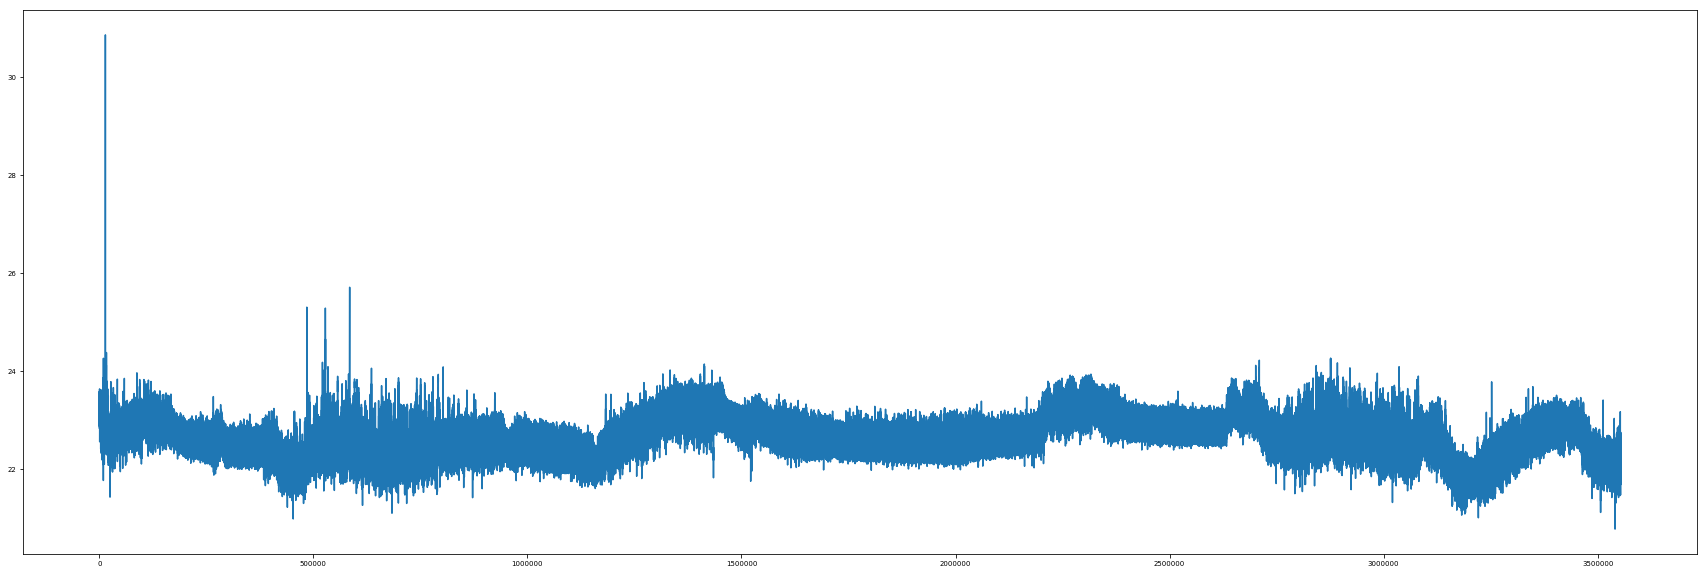

In [117]:
# plt.plot(temp_inst.rolling(window=80).mean())
plt.plot(temp_inst)

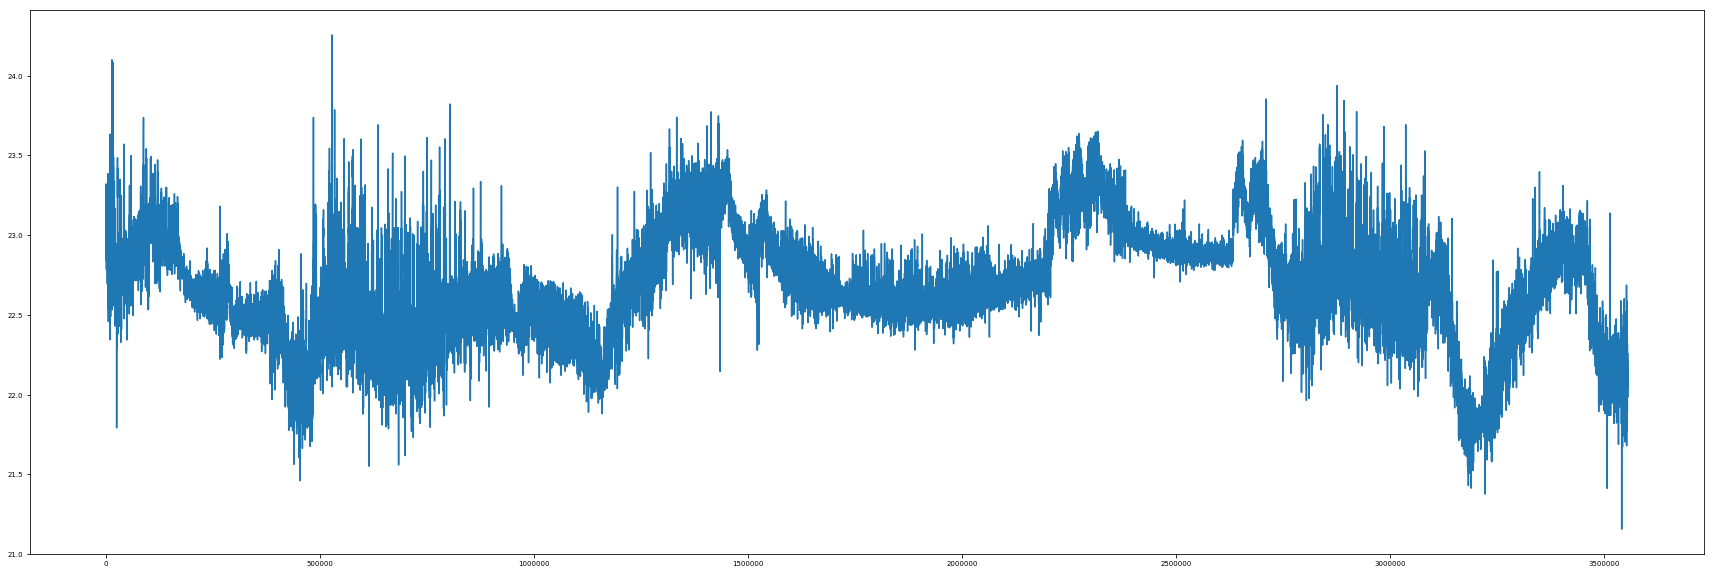

In [120]:
plt.plot(temp_inst.rolling(window=80).mean())

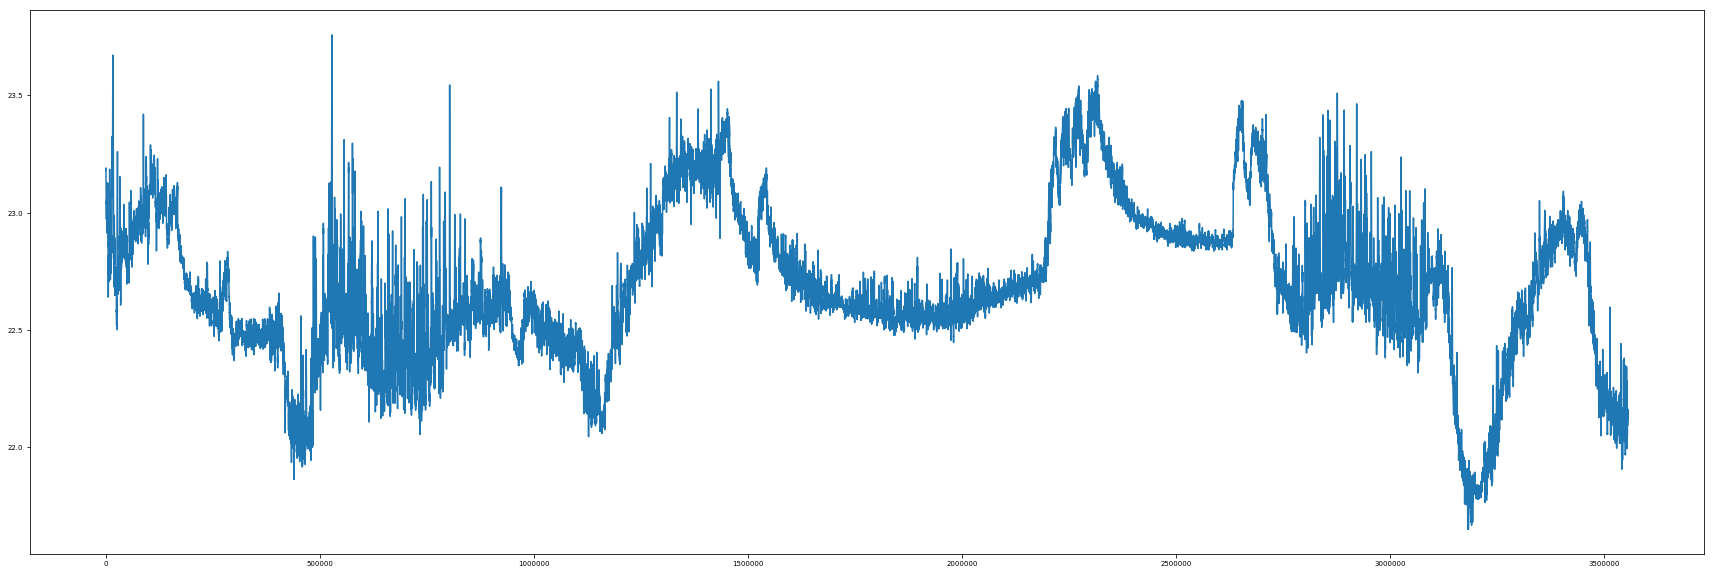

In [121]:
plt.plot(temp_inst.rolling(window=600).mean())

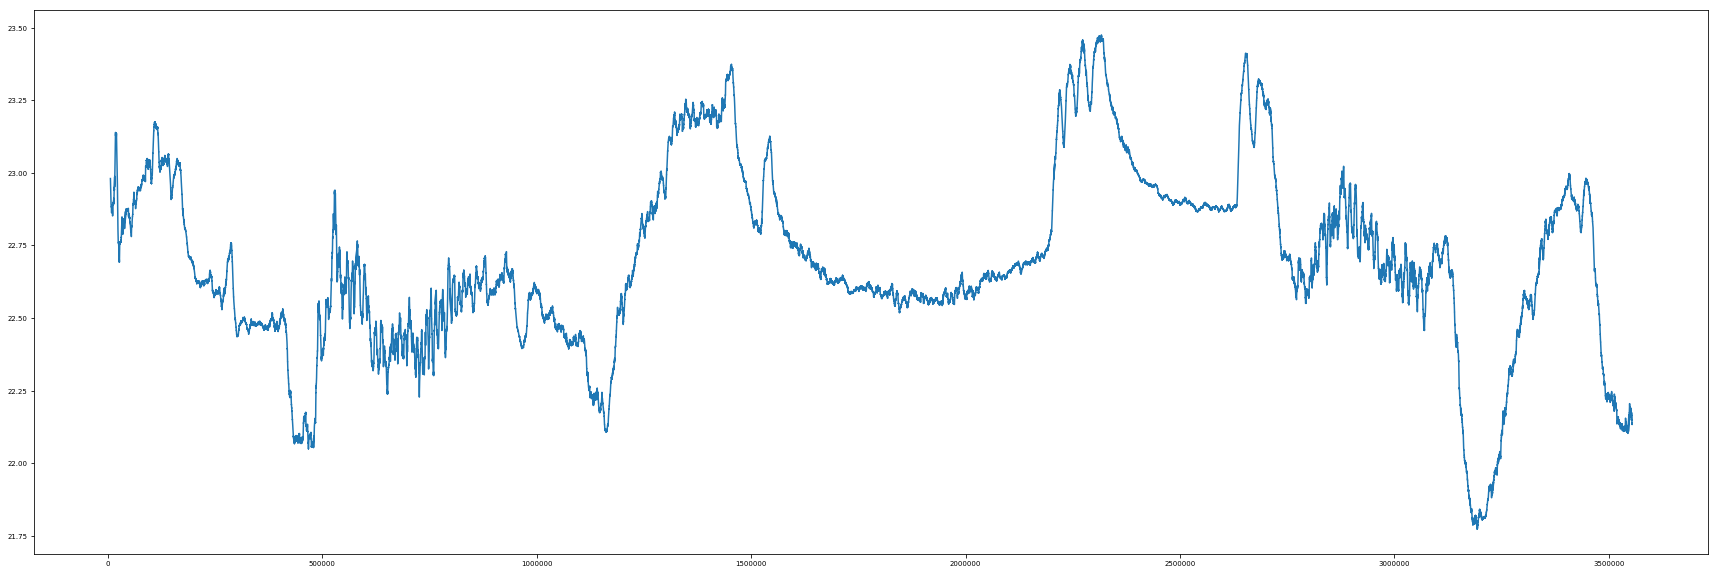

In [122]:
plt.plot(temp_inst.rolling(window=6000).mean())

In [2]:
check = 97650
chend = 3500000
    
temp_inst.iloc[check:chend][temp_inst.iloc[check:chend]>24].head()
# temp_inst.iloc[1100:]

NameError: name 'temp_inst' is not defined

# Apply [Paper](http://file.scirp.org/pdf/JCC_2017031515552013.pdf) Algorithm



$$v_{ij}(t)=\frac{1}{\tau}\sum_{k=t-(\tau-1)}^t (T_{i,j}(t)-\overline{T_{i,j}(k)})^2,$$
$$where\ \ \overline{T_{i,j}(t)}=\frac{1}{\tau}\sum_{k=t-(\tau-1)}^t T_{i,j}(t)$$

$v_{ij}(t)\ is\ the\ variance\ for\ time\ instance\ t\\\tau = time\ window\\t = time\ instance\\t\geqslant\tau\\T_{i,j}\ is\ the\ pixel\ Temperature\ at\ location\ i,j$



## Kalmann Filter


In [55]:
window_t = 10 #10 SECONDS


# get mean median and sum of each pixel

In [ ]:
sum1 = []
mean1 = []
median1 = []
norm = 3652340
for i in tnrange(1,65):
    sum1.append(df.iloc[:,i].sum())
    mean1.append(df.iloc[:,i].mean())
    median1.append(df.iloc[:,i].median())
    


In [ ]:
np.mean(mean1)

In [ ]:
# norm = len(df.iloc[:,2])

# sum1_norm = [sum1[i]/norm for i in range(len(sum1))]
# sum1_norm1 = [sum1[i]/1000000 for i in range(len(sum1))]

mean_df = pd.DataFrame({'col':mean1})
mean_df = np.flip((np.array(mean_df).reshape(8,8).astype('float').T),0)
# sum_df = sum_df.values.reshape(8,8).astype('float')
sns.heatmap(mean_df)#, vmin=22, vmax=27)

# Zero Mean each pixel

In [ ]:
centred = []
df_mean = pd.DataFrame()
for i in tnrange(1,65):
    centred = df.iloc[:,i] - mean1[i-1]
    df_mean = df_mean.append(pd.Series(centred),ignore_index=True)




In [ ]:
df_mean = df_mean.T

In [ ]:
df_mean

In [ ]:
cMean = []
for i in tnrange(64):
    cMean.append(df_mean.iloc[:,i].mean())
    
# for i in tnrange(1,65):
#     sum1.append(df.iloc[:,i].sum())
#     mean1.append(df.iloc[:,i].mean())
# df_mean.iloc[:,10].mean()

In [ ]:
cMean_df = pd.DataFrame({'col':cMean})
cMean_df = cMean_df.values.reshape(8,8).astype('float')
sns.heatmap(cMean_df)#, vmin=22, vmax=27)

In [ ]:
from scipy.interpolate import griddata
import math


points = [(math.floor(ix / 8), (ix % 8)) for ix in range(0, 64)]
grid_x, grid_y = np.mgrid[0:7:32j, 0:7:32j]
pixels = cMean
bicubic = griddata(points, pixels, (grid_x, grid_y), method='cubic')
sns.heatmap(bicubic, linewidths=0.0, vmin=0, vmax=1.6e-15)

In [ ]:


points = [(math.floor(ix / 8), (ix % 8)) for ix in range(0, 64)]
grid_x, grid_y = np.mgrid[0:7:32j, 0:7:32j]
pixels = mean1
bicubic = griddata(points, pixels, (grid_x, grid_y), method='cubic')
sns.heatmap(bicubic, linewidths=0.0)

In [ ]:
# pd.rolling_window(pd.DataFrame(sample[3:, 1:3]), window=3).count()
frames = []
# for row in df.iloc[(time_10to11_fri):(time_10to11_fri+(chunk_hour1)),1:].iterrows():
#     frames.append(np.array(row[1:]).reshape(8,8).astype('float'))
#     print(pd.Series(row[1:]).values.reshape(8,8))
df_chunk = df.iloc[(time_10to11_fri):(time_10to11_fri+(chunk_hour1)),1:]
# df_chunk.iloc[:,0]
for i in range(64):
    frames.append(df_chunk.iloc[:,i].mean())

In [ ]:
points = [(math.floor(ix / 8), (ix % 8)) for ix in range(0, 64)]
grid_x, grid_y = np.mgrid[0:7:32j, 0:7:32j]
pixels = frames
bicubic = griddata(points, pixels, (grid_x, grid_y), method='cubic')
sns.heatmap(bicubic, linewidths=0.0)

In [ ]:
fig = plt.figure()
data = frames[0]
# sns.heatmap(data, linewidths=0.5, annot=True)
def init():
    h_init = sns.heatmap(np.zeros((8, 8)), linewidths=0.5, annot=True, vmin=22, vmax=27)
    type(h_init)
    return [h_init]
def animate(i):
    plt.clf()
    data = frames[i]
    h_curr = sns.heatmap(data, linewidths=0.5, annot=True, vmin=22, vmax=27)
    return h_curr
#init()
animate(599)

In [ ]:
start_time = timeit.default_timer()
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=600, interval=60, repeat=True,blit=True)
elapsed = timeit.default_timer() - start_time
print(elapsed)

In [ ]:
start_time = timeit.default_timer()
anim.save('mymovie.mp4',fps=10)
elapsed = timeit.default_timer() - start_time
print(elapsed)
plt.close(fig)

In [ ]:
start_time = timeit.default_timer()
HTML(anim.to_html5_video())
elapsed = timeit.default_timer() - start_time
print(elapsed)

# TRAINING DATA

# Create Videos
## (Skip as time consuming and saved to file)

## Need to implent loading video from file

In [ ]:
import io
import base64
from IPython.display import HTML

video = io.open('test.mp4', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))

<IPython.core.display.Javascript object>


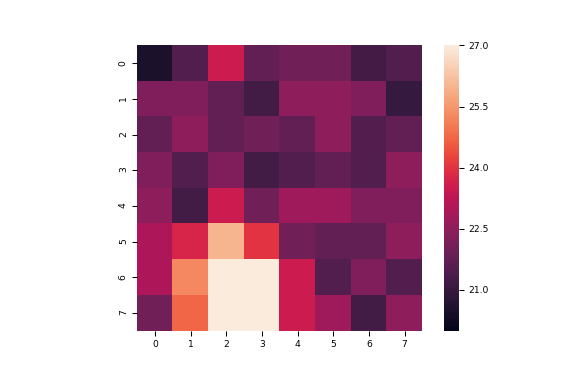

In [281]:
# Low res animation
%matplotlib nbagg
fig = plt.figure()
# plt.rcParams['animation.writer'] = 'avconv'


def init():
    sns.heatmap(np.zeros((8, 8)),vmin=20,vmax=27)

def animate(i):
    plt.clf()
    data = frames1[i]
    sns.heatmap(data, vmin=20,vmax=27,square=True)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(frames1), interval = 10, repeat = True,blit=True)

# HTML(anim.to_html5_video())
# anim._repr_html_() is None
# rc('animation', html='html5')
# anim
# plt.rcParams['animation.writer'] = 'avconv'
# anim.save('MovWave.mp4', codec='h264')

<IPython.core.display.Javascript object>


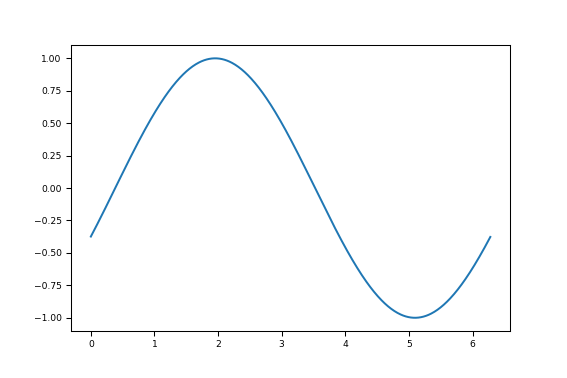

In [264]:
%matplotlib nbagg
"""
A simple example of an animated plot
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)        # x-array
line, = ax.plot(x, np.sin(x))

def animate(i):
    line.set_ydata(np.sin(x+i/10.0))  # update the data
    return line,

#Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(np.ma.array(x, mask=True))
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(1, 200), init_func=init,
    interval=25, blit=True)

In [241]:
frames1

[array([[ 21.5 ,  22.25,  21.75,  20.75,  23.5 ,  23.  ,  21.  ,  20.75],
        [ 20.75,  21.75,  22.  ,  22.75,  22.  ,  22.5 ,  22.  ,  21.25],
        [ 21.  ,  21.75,  21.  ,  21.5 ,  22.25,  21.  ,  21.25,  20.75],
        [ 20.75,  22.25,  22.25,  21.25,  21.25,  20.75,  21.  ,  22.  ],
        [ 21.75,  22.  ,  22.75,  22.  ,  22.  ,  22.  ,  21.25,  20.  ],
        [ 22.75,  23.75,  26.75,  24.  ,  22.  ,  22.  ,  22.  ,  21.25],
        [ 23.  ,  25.5 ,  27.25,  27.  ,  22.25,  21.25,  21.25,  20.25],
        [ 22.5 ,  24.25,  28.  ,  26.  ,  24.  ,  21.5 ,  22.75,  21.75]]),
 array([[ 22.25,  22.5 ,  22.5 ,  21.  ,  22.25,  22.75,  20.75,  21.75],
        [ 21.75,  22.  ,  22.25,  21.  ,  22.  ,  22.  ,  22.5 ,  22.75],
        [ 20.25,  22.25,  21.5 ,  22.25,  21.5 ,  21.75,  21.25,  21.5 ],
        [ 22.25,  21.  ,  22.25,  22.25,  22.25,  21.25,  21.75,  21.75],
        [ 22.25,  22.5 ,  22.25,  22.25,  22.25,  22.75,  22.5 ,  21.25],
        [ 23.  ,  23.5 ,  26.25,  24

In [ ]:
print(states_left,states_middle,states_right)
# states_left[0][1] - states_left[0][0]

In [ ]:
#entry wise product (Hadamard product)

In [ ]:
# from scipy import signal.savgol_filter
# y = savgol_filter(x, 5, 2)

In [ ]:
left = []
middle = []
right = []
df_temp_diffA = []
# x.append([1, 0, 1])
left = np.diff(df_tempMeans_thresh.iloc[:][0])
middle = np.diff(df_tempMeans_thresh.iloc[:][1])
right = np.diff(df_tempMeans_thresh.iloc[:][2])
df_temp_diffA.append(left)
df_temp_diffA.append(middle)
df_temp_diffA.append(right)
df_temp_diff1 = pd.DataFrame(df_temp_diffA)
df_temp_diff1 = df_temp_diff1.T

In [ ]:
assert df_temp_diff1.iloc[:,0].sum() == False


In [ ]:
for i in range(len(x)):
    print(x[i])

In [ ]:
df_temp_diff_test = df_tempMeans_thresh.diff()[1:]


In [252]:
plt.plot(df_temp_diff_test.iloc[:][0])
plt.plot(df_temp_diff_test.iloc[:][1])
plt.plot(df_temp_diff_test.iloc[:][2])
plt.show()

NameError: name 'df_temp_diff_test' is not defined

In [ ]:
start = df.index.searchsorted(dt.datetime(2017, 11, 24, 12, 0, 0, 0))
end = df.index.searchsorted(dt.datetime(2017, 11, 24, 12, 1, 0, 0))
df_sun_mid = df.iloc[start:end].mean(axis=1)


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import matplotlib.animation as animation
from IPython.core.display import HTML
%matplotlib inline

plt.rcParams['figure.figsize'] = (10,5)
fig, ax = plt.subplots()

# histogram our data with numpy
start = df.index.searchsorted(dt.datetime(2017, 11, 24, 12, 0, 0, 0))
end = df.index.searchsorted(dt.datetime(2017, 11, 24, 12, 1, 0, 0))
df_sun_mid = df.iloc[start:end].mean(axis=1)
data = df_sun_mid
Nbins = 100
n, bins = np.histogram(data, Nbins)

# get the corners of the rectangles for the histogram
left = np.array(bins[:-1]); right = np.array(bins[1:]); 
bottom = np.zeros(len(left)); top = bottom + n
nrects = len(left)


# for each rect: 1 for the MOVETO, 3 for the LINETO, 1 for the
# CLOSEPOLY; the vert for the closepoly is ignored but we still need
# it to keep the codes aligned with the vertices
nverts = nrects*(1 + 3 + 1); verts = np.zeros((nverts, 2))
codes = np.ones(nverts, int) * path.Path.LINETO
codes[0::5] = path.Path.MOVETO; codes[4::5] = path.Path.CLOSEPOLY
verts[0::5, 0] = left; verts[0::5, 1] = bottom; verts[1::5, 0] = left
verts[1::5, 1] = top; verts[2::5, 0] = right; verts[2::5, 1] = top
verts[3::5, 0] = right; verts[3::5, 1] = bottom

barpath = path.Path(verts, codes)
patch = patches.PathPatch(
    barpath, facecolor='#b80F0A', edgecolor='#000000', alpha=0.5)
ax.add_patch(patch)

ax.set_xlim(left[0], right[-1]); ax.set_ylim(bottom.min(), top.max())


def animate(i):
    # simulate new data coming in
    start = df.index.searchsorted(dt.datetime(2017, 11, 24, 12+int(np.ceil((i-60.0)/60.0)), i%60, 0, 0))
    end = df.index.searchsorted(dt.datetime(2017, 11, 24, 12+int(np.ceil((i-60.0)/60.0)), (i+1)%60, 0, 0))
    df_sun_mid = df.iloc[start:end].mean(axis=1)
    data = df_sun_mid
    n, bins = np.histogram(data, Nbins)
    top = bottom + n
    verts[1::5, 1] = top
    verts[2::5, 1] = top
    return [patch, ]


font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

plt.xlabel('Temperature ('+r'$^{\circ}C$'+')')
plt.ylabel('Frequency')
plt.title('Temperature Spread in a minute for 1 hour')

ani = animation.FuncAnimation(fig, animate, 60, repeat=True, blit=True)
HTML(ani.to_html5_video())

